In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 판다스 입문

## 판다스 자료구조

### 시리즈

#### 시리즈 만들기

In [ ]:
# k:v 구조를 갖는 딕셔너리를 만들고, 변수 dict_data에 저장
dict_data = {'a': 1, 'b': 2, 'c': 3}

# 판다스 Series() 함수로 딕셔너리(dict_data)를 시리즈로 변환. 변수 sr에 저장 
sr = pd.Series(dict_data)

# 변수 sr의 자료형 출력
print(type(sr))
print('\n')

# 변수 sr에 저장되어 있는 시리즈 객체를 출력
print(sr)

<class 'pandas.core.series.Series'>


a    1
b    2
c    3
dtype: int64


#### 인덱스 구조

In [ ]:
# 리스트를 시리즈로 변환하여 변수 sr에 저장
list_data = ['2019-01-02', 3.14, 'ABC', 100, True]
sr = pd.Series(list_data)
print(sr)
print('\n')

# 인덱스 배열은 변수 idx에 저장. 데이터 값 배열은 변수 val에 저장
idx = sr.index
val = sr.values
print(idx)
print('\n')
print(val)

0    2019-01-02
1          3.14
2           ABC
3           100
4          True
dtype: object


RangeIndex(start=0, stop=5, step=1)


['2019-01-02' 3.14 'ABC' 100 True]


#### 원소 선택

In [ ]:
# 투플을 시리즈로 변환(index 옵션에 인덱스 이름을 지정)
tup_data = ('영인', '2010-05-01', '여', True)
sr = pd.Series(tup_data, index=['이름', '생년월일', '성별', '학생여부'])
print(sr)
print('\n')

이름              영인
생년월일    2010-05-01
성별               여
학생여부          True
dtype: object




In [ ]:
# 원소를 1개 선택
print(sr[0])       # sr의 1 번째 원소를 선택 (정수형 위치 인덱스를 활용)
print(sr.iloc[0])
print(sr['이름'])  # '이름' 라벨을 가진 원소를 선택 (인덱스 이름을 활용)
print(sr.loc['이름'])
print('\n')

영인
영인
영인
영인




In [ ]:
# 여러 개의 원소를 선택 (인덱스 리스트 활용)
print(sr[[1, 2]]) 
print('\n')           
print(sr[['생년월일', '성별']])
print('\n')

생년월일    2010-05-01
성별               여
dtype: object


생년월일    2010-05-01
성별               여
dtype: object




In [ ]:
# 여러 개의 원소를 선택 (인덱스 범위 지정)
print(sr[1 : 2])  
print('\n')              
print(sr['생년월일' : '성별'])

생년월일    2010-05-01
dtype: object


생년월일    2010-05-01
성별               여
dtype: object


### 데이터프레임

#### 데이터프레임 만들기

In [ ]:
# 열이름을 key로 하고, 리스트를 value로 갖는 딕셔너리 정의(2차원 배열)
dict_data = {'c0':[1,2,3], 'c1':[4,5,6], 'c2':[7,8,9], 'c3':[10,11,12], 'c4':[13,14,15]}

# 판다스 DataFrame() 함수로 딕셔너리를 데이터프레임으로 변환. 변수 df에 저장. 
df = pd.DataFrame(dict_data)

# df의 자료형 출력
print(type(df)) 
print('\n')
# 변수 df에 저장되어 있는 데이터프레임 객체를 출력
print(df)

<class 'pandas.core.frame.DataFrame'>


   c0  c1  c2  c3  c4
0   1   4   7  10  13
1   2   5   8  11  14
2   3   6   9  12  15


In [ ]:
# 행 인덱스/열 이름 지정하여, 데이터프레임 만들기
df = pd.DataFrame([[15, '남', '덕영중'], [17, '여', '수리중']], 
                   index=['준서', '예은'],
                   columns=['나이', '성별', '학교'])

# 행 인덱스, 열 이름 확인하기
print(df)            #데이터프레임
print('\n')
print(df.index)      #행 인덱스
print('\n')
print(df.columns)    #열 이름

    나이 성별   학교
준서  15  남  덕영중
예은  17  여  수리중


Index(['준서', '예은'], dtype='object')


Index(['나이', '성별', '학교'], dtype='object')


#### (DF.rename)행 인덱스/열 이름 설정, 바꾸기

In [ ]:
# 행 인덱스, 열 이름 변경하기
df.index=['학생1', '학생2']
df.columns=['연령', '남녀', '소속']

print(df)            #데이터프레임
print('\n')
print(df.index)      #행 인덱스
print('\n')
print(df.columns)    #열 이름

     연령 남녀   소속
학생1  15  남  덕영중
학생2  17  여  수리중


Index(['학생1', '학생2'], dtype='object')


Index(['연령', '남녀', '소속'], dtype='object')


In [ ]:
# 행 인덱스/열 이름 지정하여, 데이터프레임 만들기
df = pd.DataFrame([[15, '남', '덕영중'], [17, '여', '수리중']], 
                   index=['준서', '예은'],
                   columns=['나이', '성별', '학교'])

# 열 이름 중, '나이'를 '연령'으로, '성별'을 '남녀'로, '학교'를 '소속'으로 바꾸기
df.rename(columns={'나이':'연령', '성별':'남녀', '학교':'소속'}, inplace=True)

# df의 행 인덱스 중에서, '준서'를 '학생1'로, '예은'을 '학생2'로 바꾸기
df.rename(index={'준서':'학생1', '예은':'학생2' }, inplace=True)

# df 출력(변경 후)
print(df)

     연령 남녀   소속
학생1  15  남  덕영중
학생2  17  여  수리중


#### (DF.drop)행/열 삭제

In [ ]:
# DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장 
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])

# 데이터프레임 df를 복제하여 변수 df2에 저장. df2의 1개 행(row)을 삭제
df2 = df.copy()
df2.drop('우현', inplace=True)
print(df2)

    수학  영어   음악   체육
서준  90  98   85  100
인아  70  95  100   90


In [ ]:
# 데이터프레임 df를 복제하여 변수 df3에 저장. df3의 2개 행(row)을 삭제
df3 = df.copy()
df3.drop(['우현', '인아'], axis=0, inplace=True)
print(df3)

    수학  영어  음악   체육
서준  90  98  85  100


In [ ]:
# 데이터프레임 df를 복제하여 변수 df4에 저장. df4의 1개 열(column)을 삭제
df4 = df.copy()
df4.drop('수학', axis=1, inplace=True)
print(df4)

    영어   음악   체육
서준  98   85  100
우현  89   95   90
인아  95  100   90


In [ ]:
# 데이터프레임 df를 복제하여 변수 df5에 저장. df5의 2개 열(column)을 삭제
df5 = df.copy()
df5.drop(['영어', '음악'], axis=1, inplace=True)
print(df5)

    수학   체육
서준  90  100
우현  80   90
인아  70   90


#### 행 선택

In [ ]:
# DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장 
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
df

,수학,영어,음악,체육
서준,90,98,85,100
우현,80,89,95,90
인아,70,95,100,90


In [ ]:
# 행 인덱스를 사용하여 행 1개를 선택
label1 = df.loc['서준']    # loc 인덱서 활용
position1 = df.iloc[0]     # iloc 인덱서 활용
print(label1)
print('\n')
print(position1)
print('\n')

수학     90
영어     98
음악     85
체육    100
Name: 서준, dtype: int64


수학     90
영어     98
음악     85
체육    100
Name: 서준, dtype: int64




In [ ]:
# 행 인덱스를 사용하여 2개 이상의 행 선택
label2 = df.loc[['서준', '우현']]
position2 = df.iloc[[0, 1]]
print(label2)
print('\n')
print(position2)

    수학  영어  음악   체육
서준  90  98  85  100
우현  80  89  95   90


    수학  영어  음악   체육
서준  90  98  85  100
우현  80  89  95   90


In [ ]:
# 행 인덱스의 범위를 지정하여 행 선택
label3 = df.loc['서준':'우현']
position3 = df.iloc[0:1]
print(label3)
print('\n')
print(position3)

## 이건 좀 헷갈리겠네

    수학  영어  음악   체육
서준  90  98  85  100
우현  80  89  95   90


    수학  영어  음악   체육
서준  90  98  85  100


![image.png](attachment:image.png)

![image-2.png](attachment:image-2.png)

#### 열 선택

In [ ]:
exam_data = {'이름' : [ '서준', '우현', '인아'],
             '수학' : [ 90, 80, 70],
             '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100],
             '체육' : [ 100, 90, 90]}
df = pd.DataFrame(exam_data)
df

,이름,수학,영어,음악,체육
0,서준,90,98,85,100
1,우현,80,89,95,90
2,인아,70,95,100,90


In [ ]:
# '수학' 점수 데이터만 선택. 변수 math1에 저장
math1 = df['수학'] # 이건 시리즈
print(math1)
print(type(math1))

0    90
1    80
2    70
Name: 수학, dtype: int64
<class 'pandas.core.series.Series'>


In [ ]:
# df.loc['수학']
# 이 방법은 에러 발생

In [ ]:
# '영어' 점수 데이터만 선택. 변수 english에 저장
english = df.영어
print(english)
print(type(english))

0    98
1    89
2    95
Name: 영어, dtype: int64
<class 'pandas.core.series.Series'>


In [ ]:
# '음악', '체육' 점수 데이터를 선택. 변수 music_gym 에 저장
music_gym = df[['음악', '체육']]
print(music_gym)
print(type(music_gym))

    음악   체육
0   85  100
1   95   90
2  100   90
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# '수학' 점수 데이터만 선택. 변수 math2에 저장
math2 = df[['수학']]
print(math2)
print(type(math2))

   수학
0  90
1  80
2  70
<class 'pandas.core.frame.DataFrame'>


#### 원소 선택

In [ ]:
# DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장 
exam_data = {'이름' : [ '서준', '우현', '인아'],
             '수학' : [ 90, 80, 70],
             '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100],
             '체육' : [ 100, 90, 90]}
df = pd.DataFrame(exam_data)
df

,이름,수학,영어,음악,체육
0,서준,90,98,85,100
1,우현,80,89,95,90
2,인아,70,95,100,90


(df.set_index) 특정열을 인덱스로 변경

In [ ]:
# '이름' 열을 새로운 인덱스로 지정하고, df 객체에 변경사항 반영
df.set_index('이름', inplace=True)
print(df)

    수학  영어   음악   체육
이름                  
서준  90  98   85  100
우현  80  89   95   90
인아  70  95  100   90


In [ ]:
# 데이터프레임 df의 특정 원소 1개 선택 ('서준'의 '음악' 점수)
a = df.loc['서준', '음악']
print(a)
b = df.iloc[0, 2]
print(b)

85
85


In [ ]:
# 데이터프레임 df의 특정 원소 2개 이상 선택 ('서준'의 '음악', '체육' 점수) 
c = df.loc['서준', ['음악', '체육']]
print(c)
c2 = df.loc['서준'][['음악','체육']]
print(c2)
d = df.iloc[0, [2, 3]]
print(d)
e = df.loc['서준', '음악':'체육']
print(e)
f = df.iloc[0, 2:]
print(f)

음악     85
체육    100
Name: 서준, dtype: int64
음악     85
체육    100
Name: 서준, dtype: int64
음악     85
체육    100
Name: 서준, dtype: int64
음악     85
체육    100
Name: 서준, dtype: int64
음악     85
체육    100
Name: 서준, dtype: int64


In [ ]:
# df의 2개 이상의 행과 열로부터 원소 선택 ('서준', '우현'의 '음악', '체육' 점수) 
g = df.loc[['서준', '우현'], ['음악', '체육']]
print(g)
h = df.iloc[[0, 1], [2, 3]]
print(h)
i = df.loc['서준':'우현', '음악':'체육']
print(i)
j = df.iloc[0:2, 2:]
print(j)

    음악   체육
이름         
서준  85  100
우현  95   90
    음악   체육
이름         
서준  85  100
우현  95   90
    음악   체육
이름         
서준  85  100
우현  95   90
    음악   체육
이름         
서준  85  100
우현  95   90


#### 열 추가

In [ ]:
# DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장 
exam_data = {'이름' : [ '서준', '우현', '인아'],
             '수학' : [ 90, 80, 70],
             '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100],
             '체육' : [ 100, 90, 90]}
df = pd.DataFrame(exam_data)
df

,이름,수학,영어,음악,체육
0,서준,90,98,85,100
1,우현,80,89,95,90
2,인아,70,95,100,90


In [ ]:
# 데이터프레임 df에 '국어' 점수 열(column)을 추가. 데이터 값은 80 지정
df['국어'] = 80
df

,이름,수학,영어,음악,체육,국어
0,서준,90,98,85,100,80
1,우현,80,89,95,90,80
2,인아,70,95,100,90,80


(dataframe.insert) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.insert.html

In [ ]:
df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})
df

,col1,col2
0,1,3
1,2,4


In [ ]:
df.insert(1, "newcol", [99, 99])
df

,col1,newcol,col2
0,1,99,3
1,2,99,4


In [ ]:
df.insert(0, "col1", [100, 100], allow_duplicates=True)
df

,col1,col1,newcol,col2
0,100,1,99,3
1,100,2,99,4


In [ ]:
df.insert(0, "col0", pd.Series([5, 6], index=[1, 2]))

In [ ]:
df

,col0,col1,col1,newcol,col2
0,NaN,100,1,99,3
1,5.0,100,2,99,4


#### 행 추가

In [ ]:
# DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장 
exam_data = {'이름' : ['서준', '우현', '인아'],
             '수학' : [ 90, 80, 70],
             '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100],
             '체육' : [ 100, 90, 90]}
df = pd.DataFrame(exam_data)
df

,이름,수학,영어,음악,체육
0,서준,90,98,85,100
1,우현,80,89,95,90
2,인아,70,95,100,90


In [ ]:
# 새로운 행(row)을 추가 - 같은 원소 값을 입력
df.loc[3] = 0
print(df)
print('\n')

   이름  수학  영어   음악   체육
0  서준  90  98   85  100
1  우현  80  89   95   90
2  인아  70  95  100   90
3   0   0   0    0    0




In [ ]:
print(type(df['이름'].loc[2]))
print(type(df['이름'].loc[3]))
## 같은 컬럼에 다른 형태의 데이터셋이 들어갈 수 있구나
df.info() # 하나의 데이터라도 문자가 들어가면 string으로 출력되는 듯.

<class 'str'>
<class 'int'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      4 non-null      object
 1   수학      4 non-null      int64 
 2   영어      4 non-null      int64 
 3   음악      4 non-null      int64 
 4   체육      4 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 364.0+ bytes


In [ ]:
# 새로운 행(row)을 추가 - 원소 값 여러 개의 배열 입력
df.loc[4] = ['동규', 90, 80, 70, 60]
print(df)

   이름  수학  영어   음악   체육
0  서준  90  98   85  100
1  우현  80  89   95   90
2  인아  70  95  100   90
3   0   0   0    0    0
4  동규  90  80   70   60


In [ ]:
# 새로운 행(row)을 추가 - 기존 행을 복사
df.loc['행5'] = df.loc[3]
print(df)

    이름  수학  영어   음악   체육
0   서준  90  98   85  100
1   우현  80  89   95   90
2   인아  70  95  100   90
3    0   0   0    0    0
4   동규  90  80   70   60
행5   0   0   0    0    0


DataFrame.append메서드가 있었지만, 1.4.0부터는 지원하지 않고 pd.concat으로 대신함

#### 원소 값 변경

In [ ]:
# DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장 
exam_data = {'이름' : [ '서준', '우현', '인아'],
             '수학' : [ 90, 80, 70],
             '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100],
             '체육' : [ 100, 90, 90]}
df = pd.DataFrame(exam_data)

# '이름' 열을 새로운 인덱스로 지정하고, df 객체에 변경사항 반영
df.set_index('이름', inplace=True)
df

,수학,영어,음악,체육
이름,,,,
서준,90,98,85,100
우현,80,89,95,90
인아,70,95,100,90


In [ ]:
# 데이터프레임 df의 특정 원소를 변경하는 방법: '서준'의 '체육' 점수
df.iloc[0][3] = 80
print(df)
## 0행을 선택하여 시리즈를 가져오고 해당 시리즈에서 3번(4번째)를 가져옴.

    수학  영어   음악  체육
이름                 
서준  90  98   85  80
우현  80  89   95  90
인아  70  95  100  90


In [ ]:
df.loc['서준']['체육'] = 90
print(df)

    수학  영어   음악  체육
이름                 
서준  90  98   85  90
우현  80  89   95  90
인아  70  95  100  90


In [ ]:
df.loc['서준', '체육'] = 100
print(df)

    수학  영어   음악   체육
이름                  
서준  90  98   85  100
우현  80  89   95   90
인아  70  95  100   90


#### 행, 열의 위치 바꾸기

In [ ]:
# DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장 
exam_data = {'이름' : [ '서준', '우현', '인아'],
             '수학' : [ 90, 80, 70],
             '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100],
             '체육' : [ 100, 90, 90]}
df = pd.DataFrame(exam_data)
df

,이름,수학,영어,음악,체육
0,서준,90,98,85,100
1,우현,80,89,95,90
2,인아,70,95,100,90


In [ ]:
# 데이터프레임 df를 전치하기 (메소드 활용)
df = df.transpose()
df

,0,1,2
이름,서준,우현,인아
수학,90,80,70
영어,98,89,95
음악,85,95,100
체육,100,90,90


In [ ]:
# 데이터프레임 df를 다시 전치하기 (클래스 속성 활용)
df = df.T
df

,이름,수학,영어,음악,체육
0,서준,90,98,85,100
1,우현,80,89,95,90
2,인아,70,95,100,90


## 인덱스 활용

#### (DF.set_index)특정 열을 행 인덱스로 설정

In [ ]:
exam_data = {'이름' : [ '서준', '우현', '인아'],
             '수학' : [ 90, 80, 70],
             '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100],
             '체육' : [ 100, 90, 90]}
df = pd.DataFrame(exam_data)
df

,이름,수학,영어,음악,체육
0,서준,90,98,85,100
1,우현,80,89,95,90
2,인아,70,95,100,90


In [ ]:
ndf = df.set_index(['이름'])
ndf

,수학,영어,음악,체육
이름,,,,
서준,90,98,85,100
우현,80,89,95,90
인아,70,95,100,90


In [ ]:
ndf2 = ndf.set_index('음악')
ndf2

,수학,영어,체육
음악,,,
85,90,98,100
95,80,89,90
100,70,95,90


In [ ]:
ndf3 = ndf.set_index(['수학', '음악'])
ndf3

,,영어,체육
수학,음악,,
90,85,98,100
80,95,89,90
70,100,95,90


In [ ]:
ndf3.index

MultiIndex([(90,  85),
            (80,  95),
            (70, 100)],
           names=['수학', '음악'])

In [ ]:
print(type(ndf3.loc[90, 85]))
print(ndf3.loc[90, 85])

<class 'pandas.core.series.Series'>
영어     98
체육    100
Name: (90, 85), dtype: int64


#### (DF.reindex)행 인덱스 재배열

아마도 index를 바꾸면서 그대로 카피하기 위해서 사용하는듯.

In [ ]:
# 딕셔서리를 정의
dict_data = {'c0':[1,2,3], 'c1':[4,5,6], 'c2':[7,8,9], 'c3':[10,11,12], 'c4':[13,14,15]}

# 딕셔서리를 데이터프레임으로 변환. 인덱스를 [r0, r1, r2]로 지정
df = pd.DataFrame(dict_data, index=['r0', 'r1', 'r2'])
df

,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15


In [ ]:
# 인덱스를 [r0, r1, r2, r3, r4]로 재지정
new_index = ['r0', 'r1', 'r2', 'r3', 'r4']
ndf = df.reindex(new_index)
ndf

,c0,c1,c2,c3,c4
r0,1.0,4.0,7.0,10.0,13.0
r1,2.0,5.0,8.0,11.0,14.0
r2,3.0,6.0,9.0,12.0,15.0
r3,NaN,NaN,NaN,NaN,NaN
r4,NaN,NaN,NaN,NaN,NaN


In [ ]:
# reindex로 발생한 NaN값을 숫자 0으로 채우기
new_index = ['r0', 'r1', 'r2', 'r3', 'r4']
ndf2 = df.reindex(new_index, fill_value=0)
ndf2

,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15
r3,0,0,0,0,0
r4,0,0,0,0,0


#### (DF.reset_index)행 인덱스 초기화

In [ ]:
# 딕셔서리를 정의
dict_data = {'c0':[1,2,3], 'c1':[4,5,6], 'c2':[7,8,9], 'c3':[10,11,12], 'c4':[13,14,15]}

# 딕셔서리를 데이터프레임으로 변환. 인덱스를 [r0, r1, r2]로 지정
df = pd.DataFrame(dict_data, index=['r0', 'r1', 'r2'])
df

,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15


In [ ]:
ndf = df.reset_index()
ndf

,index,c0,c1,c2,c3,c4
0,r0,1,4,7,10,13
1,r1,2,5,8,11,14
2,r2,3,6,9,12,15


#### (DF.sort_index)행 인덱스를 기준으로 데이터프레임 정렬

In [ ]:
dict_data = {'c0':[1,2,3], 'c1':[4,5,6], 'c2':[7,8,9], 'c3':[10,11,12], 'c4':[13,14,15]}

# 딕셔서리를 데이터프레임으로 변환. 인덱스를 [r0, r1, r2]로 지정
df = pd.DataFrame(dict_data, index=['r0', 'r1', 'r2'])
df

,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15


In [ ]:
# 내림차순으로 행 인덱스 정렬 
ndf = df.sort_index(ascending=False)
ndf

,c0,c1,c2,c3,c4
r2,3,6,9,12,15
r1,2,5,8,11,14
r0,1,4,7,10,13


#### (DF.sort_value) 참고

(도큐먼트) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

In [ ]:
# 딕셔서리를 정의
dict_data = {'c0':[1,2,3], 'c1':[4,5,6], 'c2':[7,8,9], 'c3':[10,11,12], 'c4':[13,14,15]}

# 딕셔서리를 데이터프레임으로 변환. 인덱스를 [r0, r1, r2]로 지정
df = pd.DataFrame(dict_data, index=['r0', 'r1', 'r2'])
df

,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15


In [ ]:
# c1 열을 기준으로 내림차순 정렬 
ndf = df.sort_values(by='c1', ascending=False)
print(ndf)

    c0  c1  c2  c3  c4
r2   3   6   9  12  15
r1   2   5   8  11  14
r0   1   4   7  10  13


In [ ]:
df = pd.DataFrame({
    'col1': ['A', 'A', 'B', np.nan, 'D', 'C'],
    'col2': [2, 1, 9, 8, 7, 4],
    'col3': [0, 1, 9, 4, 2, 3],
    'col4': ['a', 'B', 'c', 'D', 'e', 'F']
})
df

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
3,NaN,8,4,D
4,D,7,2,e
5,C,4,3,F


In [ ]:
df.sort_values(by=['col1'], axis=0, ascending=True, inplace=False, ignore_index=False)

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
5,C,4,3,F
4,D,7,2,e
3,NaN,8,4,D


## 산술연산

판다스 객체의 산술연산은 내부적으로 3단계 프로세스를 거친다.
* 행/열 인덱스를 기준으로 모든 원소를 정렬한다.
* 동일한 위치에 있는 원소끼리 일대일로 대응시킨다.
* 일대일 대응이 되는 원소끼리 연산을 처리한다.(단, 이때 대응되는 원소가 없으면 NaN으로 처리한다)

### 시리즈 연산

#### 시리즈 & 숫자

* 시리즈에 어떤 숫자를 더하면 개별 원소에 각각 숫자를 더하고 계산한 결과를 시리즈 객체로 반환한다.
* 덧셈, 뺄셈, 곱셈, 나눗셈 모두 가능.

In [ ]:
# 딕셔너리 데이터로 판다스 시리즈 만들기
student1 = pd.Series({'국어':100, '영어':80, '수학':90})
print(student1)

국어    100
영어     80
수학     90
dtype: int64


In [ ]:
# 학생의 과목별 점수를 200으로 나누기
percentage = student1 / 200
percentage

국어    0.50
영어    0.40
수학    0.45
dtype: float64

#### 시리즈 & 시리즈

* 시리즈의 모든 인덱스에 대하여 <u>같은 인덱스를 가진 원소</u>끼리 계산한다.
* 동일한 인덱스가 없는 경우 정상적으로 연산이 처리가 되지 않아 NaN으로 입력된다.
* 마찬가지로, 인덱스가 양쪽에 존재하여 대응되더라도 어느 한 쪽의 데이터 값이 NaN 경우에는, 연산불가로 NaN가 출력된다.

![image.png](attachment:image.png)

In [ ]:
# 딕셔너리 데이터로 판다스 시리즈 만들기
student1 = pd.Series({'국어':100, '영어':80, '수학':90})
student2 = pd.Series({'수학':80, '국어':90, '영어':80})

print(student1)
print('\n')
print(student2)

국어    100
영어     80
수학     90
dtype: int64


수학    80
국어    90
영어    80
dtype: int64


In [ ]:
# 두 학생의 과목별 점수로 사칙연산 수행
addition = student1 + student2               #덧셈
subtraction = student1 - student2            #뺄셈
multiplication = student1 * student2         #곱셈
division = student1 / student2               #나눗셈
print(type(division))

<class 'pandas.core.series.Series'>


In [ ]:
# 사칙연산 결과를 데이터프레임으로 합치기 (시리즈 -> 데이터프레임)
# 참고로 리스트안에 시리즈(벡터)가 들어가기 때문에 2차원임.
result = pd.DataFrame([addition, subtraction, multiplication, division], 
                      index=['덧셈', '뺄셈', '곱셈', '나눗셈'])
result

,국어,수학,영어
덧셈,190.000000,170.000,160.0
뺄셈,10.000000,10.000,0.0
곱셈,9000.000000,7200.000,6400.0
나눗셈,1.111111,1.125,1.0


In [ ]:
# 딕셔너리 데이터로 판다스 시리즈 만들기
student1 = pd.Series({'국어':np.nan, '영어':80, '수학':90})
student2 = pd.Series({'수학':80, '국어':90})

print(student1)
print('\n')
print(student2)

국어     NaN
영어    80.0
수학    90.0
dtype: float64


수학    80
국어    90
dtype: int64


In [ ]:
# 두 학생의 과목별 점수로 사칙연산 수행 (시리즈 vs. 시리즈)
addition = student1 + student2               #덧셈
subtraction = student1 - student2            #뺄셈
multiplication = student1 * student2         #곱셈
division = student1 / student2               #나눗셈
print(type(division))

<class 'pandas.core.series.Series'>


In [ ]:
# 사칙연산 결과를 데이터프레임으로 합치기 (시리즈 -> 데이터프레임)
result = pd.DataFrame([addition, subtraction, multiplication, division], 
                      index=['덧셈', '뺄셈', '곱셈', '나눗셈'])
result

,국어,수학,영어
덧셈,NaN,170.000,NaN
뺄셈,NaN,10.000,NaN
곱셈,NaN,7200.000,NaN
나눗셈,NaN,1.125,NaN


#### (srs.fill_value)연산 메소드

* 위 처럼 객체 사이에 공통 인덱스가 없거나 NaN이 포함된 경우 결과가 NaN으로 반환된다.
* 이런 상황을 피하기 위해 연산 메소드에 fill_value옵션을 적용할 수 있다.

In [ ]:
# 딕셔너리 데이터로 판다스 시리즈 만들기
student1 = pd.Series({'국어':np.nan, '영어':80, '수학':90})
student2 = pd.Series({'수학':80, '국어':90})

print(student1)
print('\n')
print(student2)

국어     NaN
영어    80.0
수학    90.0
dtype: float64


수학    80
국어    90
dtype: int64


In [ ]:
# 두 학생의 과목별 점수로 사칙연산 수행 (연산 메소드 사용)
sr_add = student1.add(student2, fill_value=0)    #덧셈
sr_sub = student1.sub(student2, fill_value=0)    #뺄셈
sr_mul = student1.mul(student2, fill_value=0)    #곱셈
sr_div = student1.div(student2, fill_value=0)    #나눗셈

# 사칙연산 결과를 데이터프레임으로 합치기 (시리즈 -> 데이터프레임)
result = pd.DataFrame([sr_add, sr_sub, sr_mul, sr_div], 
                      index=['덧셈', '뺄셈', '곱셈', '나눗셈'])

result
## NaN이 들어갈 자리에 0이 위치하게 됨.
## 따라서 80/0 = 무한대.

,국어,수학,영어
덧셈,90.0,170.000,80.0
뺄셈,-90.0,10.000,80.0
곱셈,0.0,7200.000,0.0
나눗셈,0.0,1.125,inf


### 데이터프레임 연산

* 데이터프레임은 여러 시리즈가 한데 모인 것이므로, 시리즈 연산을 확장하는 개념으로 이해하는 것이 좋다.
* 먼저 행/열 인덱스를 기준으로 정렬하고 일대일 대응되는 원소끼리 연산을 처리한다.

#### 데이터프레임 & 숫자

* 데이터 프레임에 어떤 숫자를 더하면 모든 원소에 숫자를 더한다.
* 덧셈, 뺄셈, 곱셈, 나눗셈 모두 동일하다.
* 연산 후 새로운 데이터프레임 객체로 반환된다(시리즈도 동일한가..?).

In [ ]:
# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
print(df.head())   #첫 5행만 표시
print('\n')
print(type(df))

    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


<class 'pandas.core.frame.DataFrame'>


In [ ]:
# 데이터프레임에 숫자 10 더하기
addition = df + 10
print(addition.head())   #첫 5행만 표시

    age     fare
0  32.0  17.2500
1  48.0  81.2833
2  36.0  17.9250
3  45.0  63.1000
4  45.0  18.0500


#### 데이터프레임 & 데이터프레임

* 각 데이터프레임의 같은 행, 같은 열 위치에 있는 원소끼리 계산함.

![image.png](attachment:image.png)

In [ ]:
# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
print(df.tail())          #마지막 5행을 표시
print('\n')
print(type(df))

      age   fare
886  27.0  13.00
887  19.0  30.00
888   NaN  23.45
889  26.0  30.00
890  32.0   7.75


<class 'pandas.core.frame.DataFrame'>


In [ ]:
# 데이터프레임에 숫자 10 더하기
addition = df + 10
print(addition.tail())    #마지막 5행을 표시
print('\n')
print(type(addition))

      age   fare
886  37.0  23.00
887  29.0  40.00
888   NaN  33.45
889  36.0  40.00
890  42.0  17.75


<class 'pandas.core.frame.DataFrame'>


In [ ]:
# 데이터프레임끼리 연산하기 (additon - df)
subtraction = addition - df
print(subtraction.tail())   #마지막 5행을 표시
print('\n')
print(type(subtraction))

      age  fare
886  10.0  10.0
887  10.0  10.0
888   NaN  10.0
889  10.0  10.0
890  10.0  10.0


<class 'pandas.core.frame.DataFrame'>


# 데이터 입출력

## 외부 파일 읽어오기

| File Format | Reader | Writher |
| ---- | ---- | ---- |
| CSV | read_csv | to_csv|
| JSON | read_json | to_json |
| HTML | read_html | to_html |
| Local clipboard | read_clipboard | to_clipboard |
| MS Excel | read_excel | to_excel |
| HDF5 Format | read_hdf | to_hdf |
| SQL | read_sql | to_sql |

### csv 파일

(도큐먼트) https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [ ]:
# 파일경로를 찾고, 변수 file_path에 저장
file_path = './data/read_csv_sample.csv'

# read_csv() 함수로 데이터프레임 변환. 변수 df1에 저장
df1 = pd.read_csv(file_path)
df1

,c0,c1,c2,c3
0,0,1,4,7
1,1,2,5,8
2,2,3,6,9


In [ ]:
# read_csv() 함수로 데이터프레임 변환. 변수 df2에 저장. header=None 옵션
df2 = pd.read_csv(file_path, header=None)
df2

,0,1,2,3
0,c0,c1,c2,c3
1,0,1,4,7
2,1,2,5,8
3,2,3,6,9


In [ ]:
# read_csv() 함수로 데이터프레임 변환. 변수 df3에 저장. index_col=None 옵션
df3 = pd.read_csv(file_path, index_col=None)
df3

,c0,c1,c2,c3
0,0,1,4,7
1,1,2,5,8
2,2,3,6,9


In [ ]:
# read_csv() 함수로 데이터프레임 변환. 변수 df4에 저장. index_col='c0' 옵션
df4 = pd.read_csv(file_path, index_col='c0')
df4

,c1,c2,c3
c0,,,
0,1,4,7
1,2,5,8
2,3,6,9


### excel 파일

In [1]:
# read_excel() 함수로 데이터프레임 변환 
df1 = pd.read_excel('data/남북한발전전력량.xlsx', engine='openpyxl')            # header=0 (default 옵션)
df2 = pd.read_excel('data/남북한발전전력량.xlsx', engine='openpyxl', 
                    header=None)  # header=None 옵션

NameError: ignored

In [ ]:
df1

In [ ]:
df2

### json 파일

![image.png](attachment:image.png)

In [ ]:
# read_json() 함수로 데이터프레임 변환 
df = pd.read_json('data/read_json_sample.json')  
df

,name,year,developer,opensource
pandas,,2008,Wes Mckinneye,True
NumPy,,2006,Travis Oliphant,True
matplotlib,,2003,John D. Hunter,True


In [ ]:
df.index

Index(['pandas', 'NumPy', 'matplotlib'], dtype='object')

## (이건 생략하는게 나을듯)웹(web)에서 가져오기

### HTML 웹 페이지에서 표 속성 가져오기

In [ ]:
# HTML 파일 경로 or 웹 페이지 주소를 url 변수에 저장
url ='data/sample.html'

In [ ]:
# HTML 웹페이지의 표(table)를 가져와서 데이터프레임으로 변환 
tables = pd.read_html(url)
print(type(tables)) #리스트 형태로 반환.
print(type(tables[0])) #리스트 안에는 데이터프레임이 원소로 존재함.
print(tables)

<class 'list'>
<class 'pandas.core.frame.DataFrame'>
[   Unnamed: 0  c0  c1  c2  c3
0           0   0   1   4   7
1           1   1   2   5   8
2           2   2   3   6   9,          name  year        developer  opensource
0       NumPy  2006  Travis Oliphant        True
1  matplotlib  2003   John D. Hunter        True
2      pandas  2008    Wes Mckinneye        True]


In [ ]:
# tables 리스트의 원소를 iteration하면서 각각 화면 출력
for i in range(len(tables)):
    print("tables[%s]" % i)
    print(tables[i])
    print('\n')

tables[0]
   Unnamed: 0  c0  c1  c2  c3
0           0   0   1   4   7
1           1   1   2   5   8
2           2   2   3   6   9


tables[1]
         name  year        developer  opensource
0       NumPy  2006  Travis Oliphant        True
1  matplotlib  2003   John D. Hunter        True
2      pandas  2008    Wes Mckinneye        True




In [ ]:
# 파이썬 패키지 정보가 들어 있는 두 번째 데이터프레임을 선택하여 df 변수에 저장
df = tables[1] 
df

,name,year,developer,opensource
0,NumPy,2006,Travis Oliphant,True
1,matplotlib,2003,John D. Hunter,True
2,pandas,2008,Wes Mckinneye,True


In [ ]:
# 'name' 열을 인덱스로 지정
df.set_index(['name'], inplace=True)
df

,year,developer,opensource
name,,,
NumPy,2006,Travis Oliphant,True
matplotlib,2003,John D. Hunter,True
pandas,2008,Wes Mckinneye,True


### 웹 스크래핑

In [ ]:
# 라이브러리 불러오기
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [ ]:
# 위키피디아 미국 ETF 웹 페이지에서 필요한 정보를 스크래핑하여 딕셔너리 형태로 변수 etfs에 저장
url = "https://en.wikipedia.org/wiki/List_of_American_exchange-traded_funds"
resp = requests.get(url)
print(type(resp))
resp

<class 'requests.models.Response'>


<Response [200]>

In [ ]:
soup = BeautifulSoup(resp.text, 'lxml')
print(type(soup))
soup

<class 'bs4.BeautifulSoup'>


<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of American exchange-traded funds - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"927fcabe-6ba1-44e3-b087-233dd42eaf2a","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_American_exchange-traded_funds","wgTitle":"List of American exchange-traded funds","wgCurRevisionId":1071580546,"wgRevisionId":1071580546,"wgArticleId":16294432,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Dynami

In [ ]:
rows = soup.select('div > ul > li')
print(type(rows))
rows

<class 'bs4.element.ResultSet'>


[<li class="toclevel-1 tocsection-1"><a href="#Stock_ETFs"><span class="tocnumber">1</span> <span class="toctext">Stock ETFs</span></a>
 <ul>
 <li class="toclevel-2 tocsection-2"><a href="#Broad_market_ETFs"><span class="tocnumber">1.1</span> <span class="toctext">Broad market ETFs</span></a></li>
 <li class="toclevel-2 tocsection-3"><a href="#Index-tracking_ETFs"><span class="tocnumber">1.2</span> <span class="toctext">Index-tracking ETFs</span></a></li>
 <li class="toclevel-2 tocsection-4"><a href="#Style_ETFs"><span class="tocnumber">1.3</span> <span class="toctext">Style ETFs</span></a>
 <ul>
 <li class="toclevel-3 tocsection-5"><a href="#Large-cap_ETFs"><span class="tocnumber">1.3.1</span> <span class="toctext">Large-cap ETFs</span></a></li>
 <li class="toclevel-3 tocsection-6"><a href="#Mid-cap_ETFs"><span class="tocnumber">1.3.2</span> <span class="toctext">Mid-cap ETFs</span></a></li>
 <li class="toclevel-3 tocsection-7"><a href="#Small-cap_ETFs"><span class="tocnumber">1.3.3</

In [ ]:
etfs = {}
for row in rows:
    
    try:
        etf_name = re.findall('^(.*) \(NYSE', row.text)
        etf_market = re.findall('\((.*)\|', row.text)
        etf_ticker = re.findall('NYSE Arca\|(.*)\)', row.text)
        
        if (len(etf_ticker) > 0) & (len(etf_market) > 0) & (len(etf_name) > 0):
            etfs[etf_ticker[0]] = [etf_market[0], etf_name[0]]

    except AttributeError as err:
        pass   

In [ ]:
etfs

{}

In [ ]:
df = pd.DataFrame(etfs)
df

""


## (이것도 일단 생략) API를 활용하여 데이터 수집하기

In [ ]:
'''# 라이브러리 가져오기
import googlemaps
import pandas as pd

# my_key = "----발급받은 API 키를 입력-----"

# 구글맵스 객체 생성하기
maps = googlemaps.Client(key=my_key)  # my key값 입력

lat = []  #위도
lng = []  #경도

# 장소(또는 주소) 리스트
places = ["서울시청", "국립국악원", "해운대해수욕장"]

i=0
for place in places:   
    i = i + 1
    try:
        print(i, place)
        # 지오코딩 API 결과값 호출하여 geo_location 변수에 저장
        geo_location = maps.geocode(place)[0].get('geometry')
        lat.append(geo_location['location']['lat'])
        lng.append(geo_location['location']['lng'])
        
    except:
        lat.append('')
        lng.append('')
        print(i)

# 데이터프레임으로 변환하기
df = pd.DataFrame({'위도':lat, '경도':lng}, index=places)
print('\n')
print(df)'''

'# 라이브러리 가져오기\nimport googlemaps\nimport pandas as pd\n\n# my_key = "----발급받은 API 키를 입력-----"\n\n# 구글맵스 객체 생성하기\nmaps = googlemaps.Client(key=my_key)  # my key값 입력\n\nlat = []  #위도\nlng = []  #경도\n\n# 장소(또는 주소) 리스트\nplaces = ["서울시청", "국립국악원", "해운대해수욕장"]\n\ni=0\nfor place in places:   \n    i = i + 1\n    try:\n        print(i, place)\n        # 지오코딩 API 결과값 호출하여 geo_location 변수에 저장\n        geo_location = maps.geocode(place)[0].get(\'geometry\')\n        lat.append(geo_location[\'location\'][\'lat\'])\n        lng.append(geo_location[\'location\'][\'lng\'])\n        \n    except:\n        lat.append(\'\')\n        lng.append(\'\')\n        print(i)\n\n# 데이터프레임으로 변환하기\ndf = pd.DataFrame({\'위도\':lat, \'경도\':lng}, index=places)\nprint(\'\n\')\nprint(df)'

## 데이터 저장하기

### (DF.to_csv) csv 파일로 저장

In [ ]:
# 판다스 DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장 
data = {'name' : [ 'Jerry', 'Riah', 'Paul'],
        'algol' : [ "A", "A+", "B"],
        'basic' : [ "C", "B", "B+"],
        'c++' : [ "B+", "C", "C+"],
        }
df = pd.DataFrame(data)
df.set_index('name', inplace=True)   #name 열을 인덱스로 지정
df

,algol,basic,c++
name,,,
Jerry,A,C,B+
Riah,A+,B,C
Paul,B,B+,C+


In [ ]:
'''df.to_csv("./df_sample.csv")'''

'df.to_csv("./df_sample.csv")'

![image.png](attachment:image.png)

### json 파일로 저장

In [ ]:
# 판다스 DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장 
data = {'name' : [ 'Jerry', 'Riah', 'Paul'],
        'algol' : [ "A", "A+", "B"],
        'basic' : [ "C", "B", "B+"],
        'c++' : [ "B+", "C", "C+"],
        }

df = pd.DataFrame(data)
df.set_index('name', inplace=True)   #name 열을 인덱스로 지정
df

,algol,basic,c++
name,,,
Jerry,A,C,B+
Riah,A+,B,C
Paul,B,B+,C+


In [ ]:
'''# to_json() 메소드를 사용하여 JSON 파일로 내보내기. 파열명은 df_sample.json로 저장
df.to_json("./df_sample.json")'''

'# to_json() 메소드를 사용하여 JSON 파일로 내보내기. 파열명은 df_sample.json로 저장\ndf.to_json("./df_sample.json")'

![image.png](attachment:image.png)

### excel 파일로 저장

In [ ]:
# 판다스 DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장 
data = {'name' : [ 'Jerry', 'Riah', 'Paul'],
        'algol' : [ "A", "A+", "B"],
        'basic' : [ "C", "B", "B+"],
        'c++' : [ "B+", "C", "C+"],
        }

df = pd.DataFrame(data)
df.set_index('name', inplace=True)   #name 열을 인덱스로 지정
df

,algol,basic,c++
name,,,
Jerry,A,C,B+
Riah,A+,B,C
Paul,B,B+,C+


In [ ]:
'''# to_excel() 메소드를 사용하여 엑셀 파일로 내보내기. 파열명은 df_sample.xlsx로 저장
df.to_excel("./df_sample.xlsx")'''

'# to_excel() 메소드를 사용하여 엑셀 파일로 내보내기. 파열명은 df_sample.xlsx로 저장\ndf.to_excel("./df_sample.xlsx")'

![image.png](attachment:image.png)

### 여러 개의 데이터프레임을 하나의 excel 파일로 저장

In [ ]:
# 판다스 DataFrame() 함수로 데이터프레임 변환. 변수 df1, df2에 저장 
data1 = {'name' : [ 'Jerry', 'Riah', 'Paul'],
         'algol' : [ "A", "A+", "B"],
         'basic' : [ "C", "B", "B+"],
          'c++' : [ "B+", "C", "C+"]}

data2 = {'c0':[1,2,3], 
         'c1':[4,5,6], 
         'c2':[7,8,9], 
         'c3':[10,11,12], 
         'c4':[13,14,15]}

df1 = pd.DataFrame(data1)
df1.set_index('name', inplace=True)      #name 열을 인덱스로 지정
df1

,algol,basic,c++
name,,,
Jerry,A,C,B+
Riah,A+,B,C
Paul,B,B+,C+


In [ ]:
df2 = pd.DataFrame(data2)
df2.set_index('c0', inplace=True)        #c0 열을 인덱스로 지정
df2

,c1,c2,c3,c4
c0,,,,
1,4,7,10,13
2,5,8,11,14
3,6,9,12,15


In [ ]:
'''# df1을 'sheet1'으로, df2를 'sheet2'로 저장 (엑셀파일명은 "df_excelwriter.xlsx")
writer = pd.ExcelWriter("./df_excelwriter.xlsx")
df1.to_excel(writer, sheet_name="sheet1")
df2.to_excel(writer, sheet_name="sheet2")
writer.save()'''

'# df1을 \'sheet1\'으로, df2를 \'sheet2\'로 저장 (엑셀파일명은 "df_excelwriter.xlsx")\nwriter = pd.ExcelWriter("./df_excelwriter.xlsx")\ndf1.to_excel(writer, sheet_name="sheet1")\ndf2.to_excel(writer, sheet_name="sheet2")\nwriter.save()'

![image.png](attachment:image.png)

# 데이터 살펴보기

## 데이터프레임의 구조

### 데이터 내용 미리보기

### 데이터 요약 정보 확인하기

In [ ]:
# read_csv() 함수로 df 생성
df = pd.read_csv('data/auto-mpg.csv', header=None)
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [ ]:
# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']


In [ ]:
# 데이터프레임 df의 내용을 일부 확인 
print(df.head())     # 처음 5개의 행
print('\n')
print(df.tail())     # 마지막 5개의 행

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


      mpg  cylinders  displacement horsepower  weight  acceleration  \
393  27.0          4         140.0      86.00  2790.0          15.6   
394  44.0          4          97.0      52.00  2130.0          24.6   
395  32.0          4         135.0      84.00  2295.0          1

#### 데이터프레임의 크기(행, 열)

In [ ]:
# df의 모양과 크기 확인: (행의 개수, 열의 개수)를 투플로 반환 
print(df.shape)

(398, 9)


#### 데이터프레임의 기본 정보

In [ ]:
# 데이터프레임 df의 내용 확인 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [ ]:
# 데이터프레임 df의 자료형 확인 
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object


In [ ]:
# 시리즈(mog 열)의 자료형 확인 
print(df.mpg.dtypes)

float64


#### 데이터프레임의 기술 통계 정보 요약

In [ ]:
# 데이터프레임 df의 기술통계 정보 확인 
print(df.describe())
print('\n')
print(df.describe(include='all')) #산술 데이터가 아닌 열의 데이터를 포함하는 옵션.

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


               mpg   cylinders  displacemen

![image.png](attachment:image.png)

### 데이터 개수 확인

#### (DF.count)각 열의 데이터 개수

In [ ]:
# read_csv() 함수로 df 생성
df = pd.read_csv('data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [ ]:
# 데이터프레임 df의 각 열이 가지고 있는 원소 개수 확인 
print(df.count())

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
origin          398
name            398
dtype: int64


In [ ]:
# df.count()가 반환하는 객체 타입 출력
print(type(df.count()))

<class 'pandas.core.series.Series'>


#### (SRS.value_counts)각 열의 고유값 개수

In [ ]:
# 데이터프레임 df의 특정 열이 가지고 있는 고유값 확인 
unique_values = df['origin'].value_counts() 
print(unique_values)

1    249
3     79
2     70
Name: origin, dtype: int64


In [ ]:
# value_counts 메소드가 반환하는 객체 타입 출력
print(type(unique_values))

<class 'pandas.core.series.Series'>


## 통계 함수 적용

In [ ]:
# read_csv() 함수로 df 생성
df = pd.read_csv('data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


### 평균값

In [ ]:
# 평균값 
print(df.mean())

mpg               23.514573
cylinders          5.454774
displacement     193.425879
weight          2970.424623
acceleration      15.568090
model year        76.010050
origin             1.572864
dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_19240\1911105376.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.mean())


In [ ]:
print(df['mpg'].mean())
print(df.mpg.mean())

23.514572864321607
23.514572864321607


In [ ]:
print(df[['mpg','weight']].mean())

mpg         23.514573
weight    2970.424623
dtype: float64


### 중간값

In [ ]:
print(df.median())
# s나중에는 불필요한 열을 삭제하는 작업을 자동으로 해주지 않을 수 있음
# C:\Users\User\AppData\Local\Temp/ipykernel_16920/4259369830.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
#   print(df.median())

mpg               23.0
cylinders          4.0
displacement     148.5
weight          2803.5
acceleration      15.5
model year        76.0
origin             1.0
dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_19240\3919276738.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.median())


In [ ]:
print(df['mpg'].median())

23.0


### 최대값

In [ ]:
# 최대값 
print(df.max())

mpg                         46.6
cylinders                      8
displacement               455.0
horsepower                     ?
weight                    5140.0
acceleration                24.8
model year                    82
origin                         3
name            vw rabbit custom
dtype: object


In [ ]:
print(df['mpg'].max())

46.6


### 최소값

In [ ]:
# 최소값 
print(df.min())

mpg                                 9.0
cylinders                             3
displacement                       68.0
horsepower                        100.0
weight                           1613.0
acceleration                        8.0
model year                           70
origin                                1
name            amc ambassador brougham
dtype: object


In [ ]:
print(df['mpg'].min())

9.0


### 표준편차

In [ ]:
# 표준편차 
print(df.std())

mpg               7.815984
cylinders         1.701004
displacement    104.269838
weight          846.841774
acceleration      2.757689
model year        3.697627
origin            0.802055
dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_19240\2256554732.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.std())


In [ ]:
print(df['mpg'].std())

7.815984312565782


### 상관계수

In [ ]:
# 상관계수 
df.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [ ]:
print(df[['mpg','weight']].corr())

             mpg    weight
mpg     1.000000 -0.831741
weight -0.831741  1.000000


## 판다스 내장 그래프 도구 활용

#### 선 그래프

In [ ]:
df = pd.read_excel('data/남북한발전전력량.xlsx', engine='openpyxl')  # 데이터프레임 변환 

df_ns = df.iloc[[0, 5], 3:]            # 남한, 북한 발전량 합계 데이터만 추출
df_ns.index = ['South','North']        # 행 인덱스 변경
df_ns.columns = df_ns.columns.map(int) # 열 이름의 자료형을 정수형으로 변경
df_ns.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
South,1186,1310,1444,1650,1847,2055,2244,2153,2393,2664,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
North,263,247,221,231,230,213,193,170,186,194,...,236,255,235,237,211,215,221,216,190,239


In [ ]:
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


<AxesSubplot:>

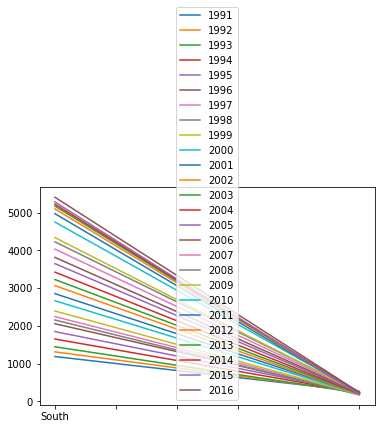

In [ ]:
# 선 그래프 그리기
df_ns.plot()

In [ ]:
# 행, 열 전치하여 다시 그리기
tdf_ns = df_ns.T
print(tdf_ns.head())

     South North
1991  1186   263
1992  1310   247
1993  1444   221
1994  1650   231
1995  1847   230


<AxesSubplot:>

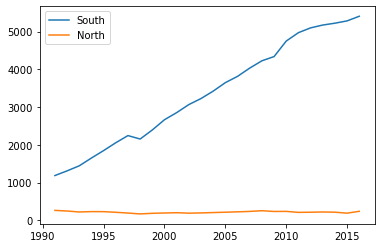

In [ ]:
tdf_ns.plot()

#### 막대그래프

In [ ]:
df = pd.read_excel('data/남북한발전전력량.xlsx', engine='openpyxl')  # 데이터프레임 변환 

df_ns = df.iloc[[0, 5], 3:]            # 남한, 북한 발전량 합계 데이터만 추출
df_ns.index = ['South','North']        # 행 인덱스 변경
df_ns.columns = df_ns.columns.map(int) # 열 이름의 자료형을 정수형(문자->정수)으로 변경
df_ns

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
South,1186,1310,1444,1650,1847,2055,2244,2153,2393,2664,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
North,263,247,221,231,230,213,193,170,186,194,...,236,255,235,237,211,215,221,216,190,239


<AxesSubplot:>

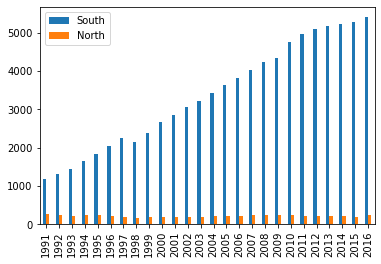

In [ ]:
# 행, 열 전치하여 막대 그래프 그리기
tdf_ns = df_ns.T
tdf_ns.plot(kind='bar')

#### 히스토그램

In [ ]:
df = pd.read_excel('data/남북한발전전력량.xlsx', engine='openpyxl')  # 데이터프레임 변환 

df_ns = df.iloc[[0, 5], 3:]            # 남한, 북한 발전량 합계 데이터만 추출
df_ns.index = ['South','North']        # 행 인덱스 변경
df_ns.columns = df_ns.columns.map(int) # 열 이름의 자료형을 정수형으로 변경
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
tdf_ns = df_ns.T
for col_name in tdf_ns.columns:
    tdf_ns[col_name] = tdf_ns[col_name].astype(int)
tdf_ns.dtypes

South    int32
North    int32
dtype: object

<AxesSubplot:ylabel='Frequency'>

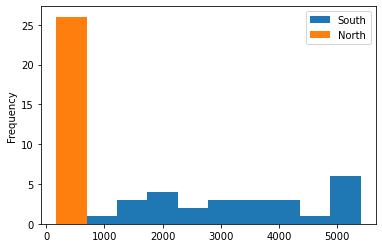

In [ ]:
# 행, 열 전치하여 히스토그램 그리기
tdf_ns.plot(kind='hist')

#### 산점도

In [ ]:
# read_csv() 함수로 df 생성
df = pd.read_csv('data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

<AxesSubplot:xlabel='weight', ylabel='mpg'>

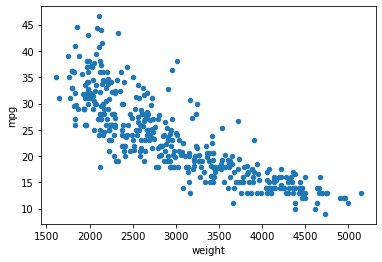

In [ ]:
# 2개의 열을 선택하여 산점도 그리기
df.plot(x='weight',y='mpg', kind='scatter')

#### 박스 플롯

In [ ]:
# read_csv() 함수로 df 생성
df = pd.read_csv('data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

<AxesSubplot:>

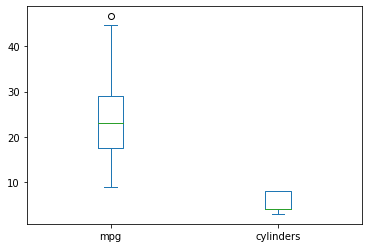

In [ ]:
# 열을 선택하여 박스 플롯 그리기
df[['mpg','cylinders']].plot(kind='box')

# 시각화 도구

## Matplotlib - 기본 그래프 도구

### 선 그래프

In [ ]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('data/시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)
df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [ ]:
df.isnull().sum() # 수치에는 널 값이 없다

전출지별    306
전입지별      0
1970      0
1971      0
1972      0
1973      0
1974      0
1975      0
1976      0
1977      0
1978      0
1979      0
1980      0
1981      0
1982      0
1983      0
1984      0
1985      0
1986      0
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
dtype: int64

In [ ]:
# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')
df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [ ]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
# df_seoul = df.loc[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


#### 기본 사용법

In [ ]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']
sr_one

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
1978    237684
1979    278411
1980    297539
1981    252073
1982    320174
1983    400875
1984    352238
1985    390265
1986    412535
1987    405220
1988    415174
1989    412933
1990    473889
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
1996    520566
1997    495454
1998    407050
1999    471841
2000    435573
2001    499575
2002    516765
2003    457656
2004    400206
2005    414621
2006    449632
2007    431637
2008    412408
2009    398282
2010    410735
2011    373771
2012    354135
2013    340801
2014    332785
2015    359337
2016    370760
2017    342433
Name: 경기도, dtype: object

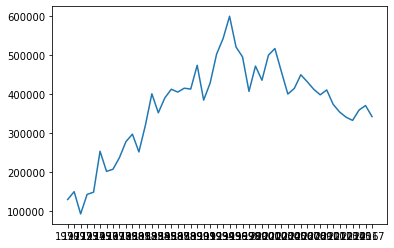

In [ ]:
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

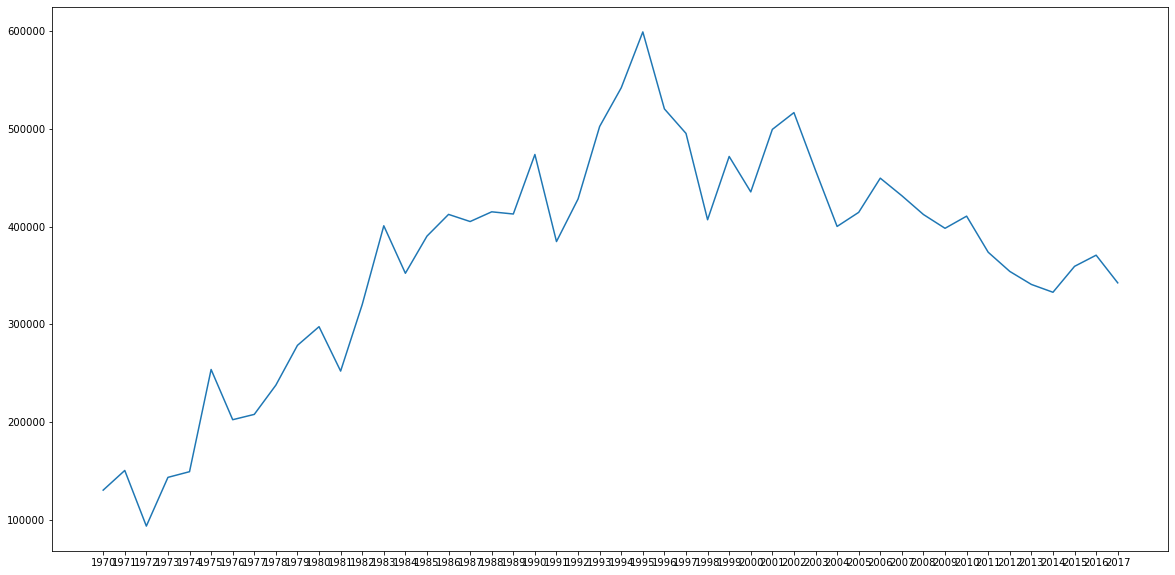

In [ ]:
# 판다스 객체를 plot 함수에 입력
plt.figure(figsize=(20,10))
plt.plot(sr_one) # 시리즈를 넣으면 자동으로 인덱스가 들어가는 모양이네

#### 차트 제목, 축 이름 추가

C:\Users\User\anaconda3\envs\visualization\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\visualization\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\visualization\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\visualization\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\envs\visualization\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) miss

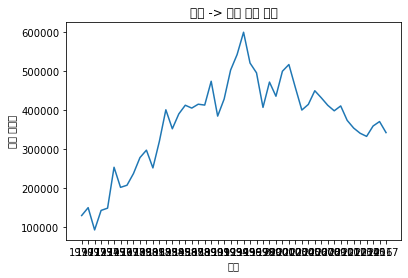

In [ ]:
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()  # 변경사항 저장하고 그래프 출력

#### Matplotlib 한글 폰트 오류 해결

In [ ]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"   #윈도우의 폰트파일 위치. 직접 다운받아서 경로를 지정해도 됨.
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

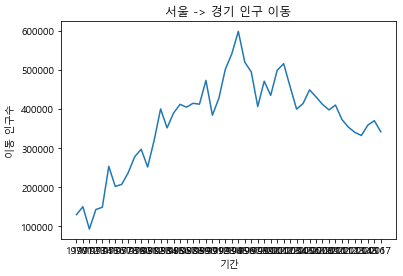

In [ ]:
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()  # 변경사항 저장하고 그래프 출력

#### 그래프 꾸미기

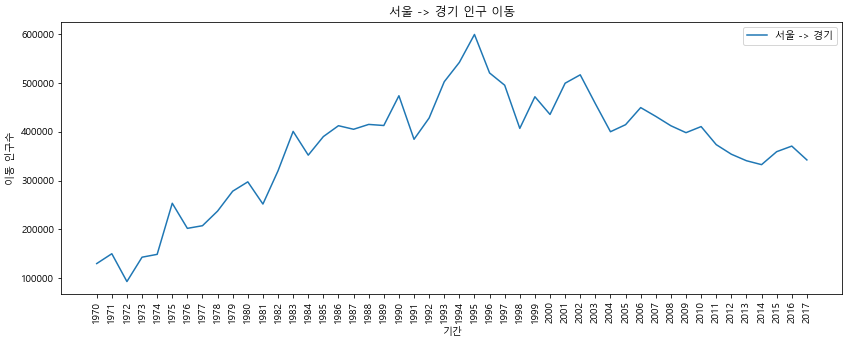

In [ ]:
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))
# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

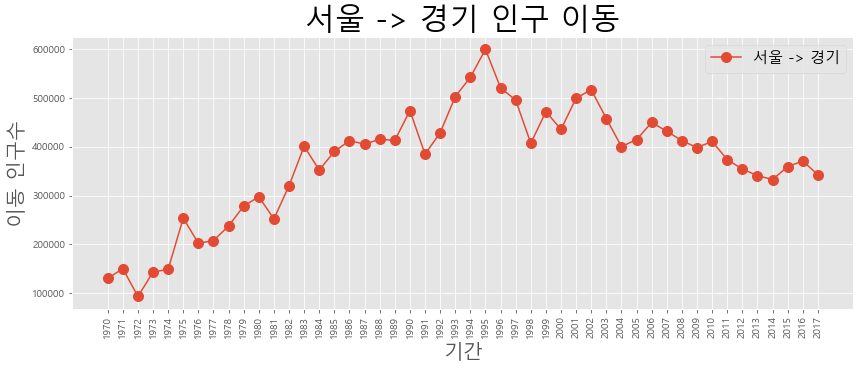

In [ ]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 그림 사이즈 지정
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)  # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30)  #차트 제목
plt.xlabel('기간', size=20)                  #x축 이름
plt.ylabel('이동 인구수', size=20)           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)   #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

In [ ]:
# 스타일 리스트 출력
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


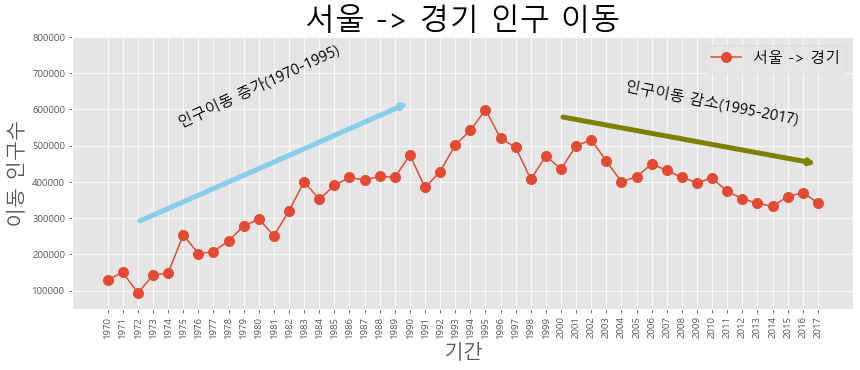

In [ ]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 그림 사이즈 늘리기
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)  # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30)  #차트 제목
plt.xlabel('기간', size=20)                  #x축 이름
plt.ylabel('이동 인구수', size=20)           #y축 이름

#범례 표시
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)

# y축 범위 지정 (최소값, 최대값)
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20, 620000),       #화살표의 머리 부분(끝점)
             xytext=(2, 290000),    #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), #화살표 서식
             )

plt.annotate('',
             xy=(47, 450000),       #화살표의 머리 부분(끝점)
             xytext=(30, 580000),   #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='olive', lw=5),  #화살표 서식
             )

# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)',  #텍스트 입력
             xy=(10, 550000),            #텍스트 위치 기준점
             rotation=25,                #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

plt.annotate('인구이동 감소(1995-2017)',  #텍스트 입력
             xy=(40, 560000),            #텍스트 위치 기준점
             rotation=-11,               #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

plt.show()  # 변경사항 저장하고 그래프 출력

#### 화면 분할하여 그래프 여러개 그리기 - axe 객체 활용

* 여러개의 axe 객체를 만들고 분할된 화면마다 axe 객체를 하나씩 배정하는 방식.
* axe 객체는 각각 서로 다른 그래프를 표현할 수 있음.
* 단, axe 객체를 1개만 생성하는 경우에는 하나의 그래프만 표시됨

C:\Users\User\AppData\Local\Temp\ipykernel_19240\2531580727.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
C:\Users\User\AppData\Local\Temp\ipykernel_19240\2531580727.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=75)


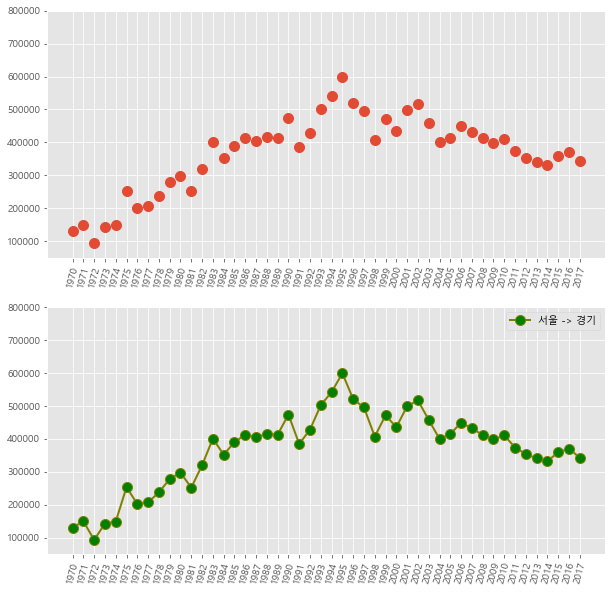

In [ ]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(10, 10))   
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10, 
         color='olive', linewidth=2, label='서울 -> 경기')
ax2.legend(loc='best')

#y축 범위 지정 (최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()  # 변경사항 저장하고 그래프 출력

C:\Users\User\AppData\Local\Temp\ipykernel_19240\2756445570.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index, rotation=75)


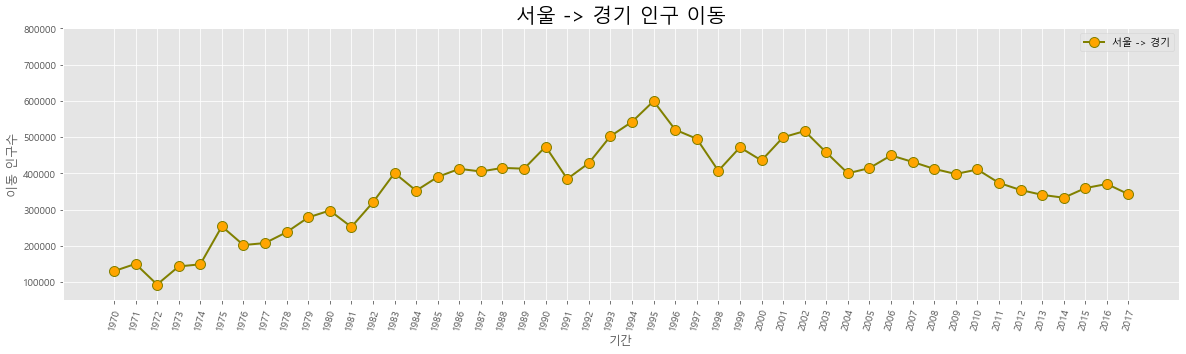

In [ ]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 5))   
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one, marker='o', markerfacecolor='orange', markersize=10, 
        color='olive', linewidth=2, label='서울 -> 경기')
ax.legend(loc='best')

#y축 범위 지정 (최소값, 최대값)
ax.set_ylim(50000, 800000)

# 차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size=20)

# 축이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size = 12)

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation=75)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10) # x축을 의미하는듯
ax.tick_params(axis="y", labelsize=10)

plt.show()  # 변경사항 저장하고 그래프 출력

In [ ]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('data/시도별 전출입 인구수.xlsx', engine= 'openpyxl', header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [ ]:
# 서울에서 '충청남도','경상북도', '강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도', '강원도'], col_years]
df_3

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


C:\Users\User\AppData\Local\Temp\ipykernel_19240\2205009510.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation=90)


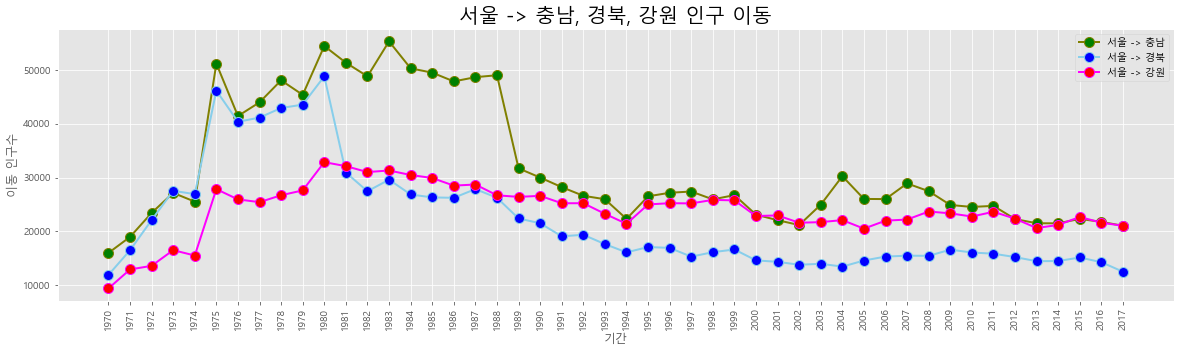

In [ ]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 5))   
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green', 
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='blue', 
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='red', 
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')

# 범례 표시
ax.legend(loc='best')

# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)
# fig.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20): 이건 안되는 것임.
# plt.title('눈누') --> 이건 되는데, 위에서 설정한 타이틀에 덮어써짐

# 축이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size = 12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()  # 변경사항 저장하고 그래프 출력

In [ ]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


C:\Users\User\AppData\Local\Temp\ipykernel_19240\879083280.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation=90)
C:\Users\User\AppData\Local\Temp\ipykernel_19240\879083280.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation=90)
C:\Users\User\AppData\Local\Temp\ipykernel_19240\879083280.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation=90)
C:\Users\User\AppData\Local\Temp\ipykernel_19240\879083280.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation=90)


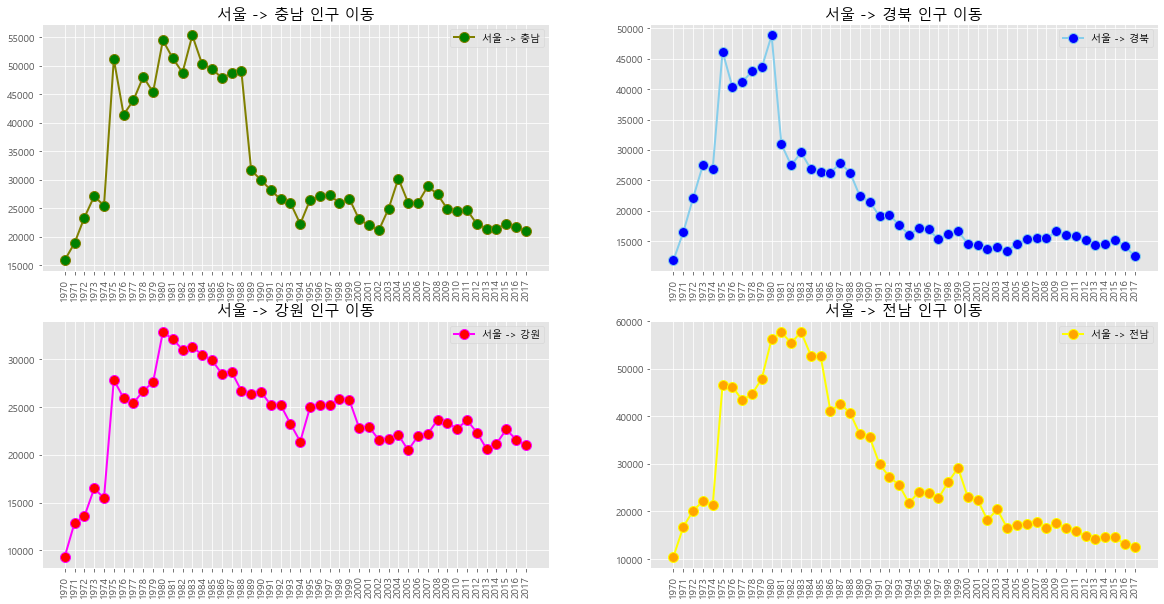

In [ ]:
plt.style.use('ggplot') 

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 10))   
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(col_years, df_4.loc['충청남도',:], marker='o', markerfacecolor='green', 
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax2.plot(col_years, df_4.loc['경상북도',:], marker='o', markerfacecolor='blue', 
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax3.plot(col_years, df_4.loc['강원도',:], marker='o', markerfacecolor='red', 
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')
ax4.plot(col_years, df_4.loc['전라남도',:], marker='o', markerfacecolor='orange', 
        markersize=10, color='yellow', linewidth=2, label='서울 -> 전남')

# 범례 표시
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

# 차트 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size=15)
ax2.set_title('서울 -> 경북 인구 이동', size=15)
ax3.set_title('서울 -> 강원 인구 이동', size=15)
ax4.set_title('서울 -> 전남 인구 이동', size=15)

# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show()  # 변경사항 저장하고 그래프 출력

#### matplot에서 사용할 수 있는 색의 종류

In [ ]:
# 컬러 정보를 담을 빈 딕셔너리 생성
colors={}

# 컬러 이름과 헥사코드 확인하여 딕셔서리에 입력
for name, hex in mpl.colors.cnames.items():
	colors[name] = hex

# 딕셔너리 출력    
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

### 면적 그래프

In [ ]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('data/시도별 전출입 인구수.xlsx', engine= 'openpyxl', header=0)
df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [ ]:
# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [ ]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()
df_4

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314
1975,51205,46177,27837,46610
1976,41447,40376,25927,46251
1977,43993,41155,25415,43430
1978,48091,42940,26700,44624
1979,45388,43565,27599,47934


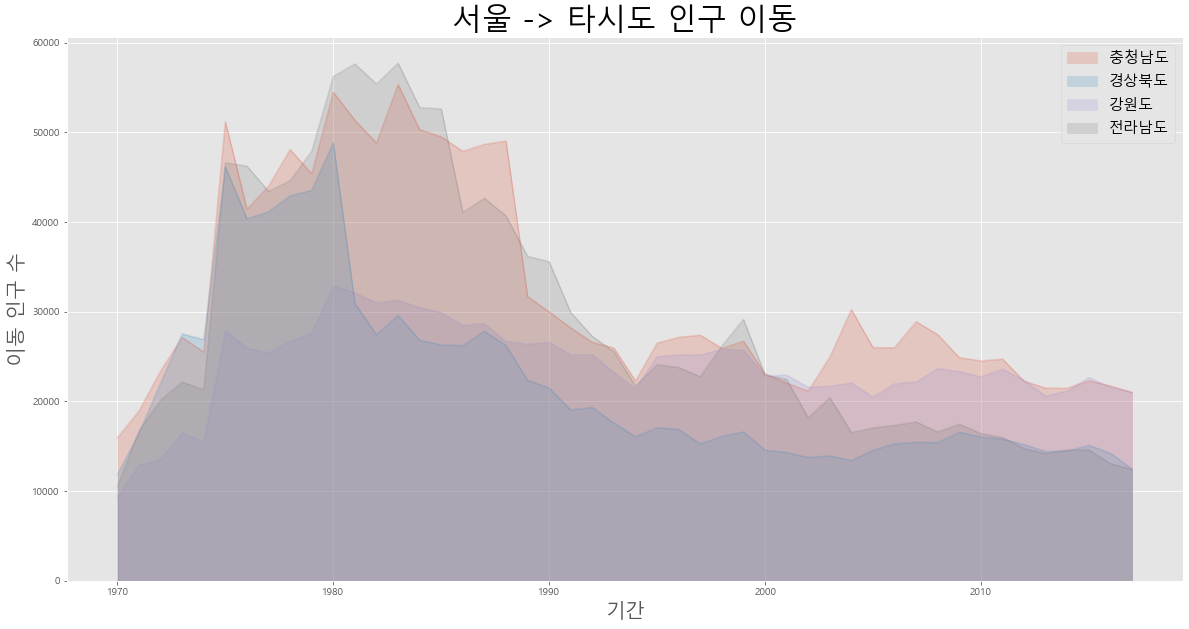

In [ ]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

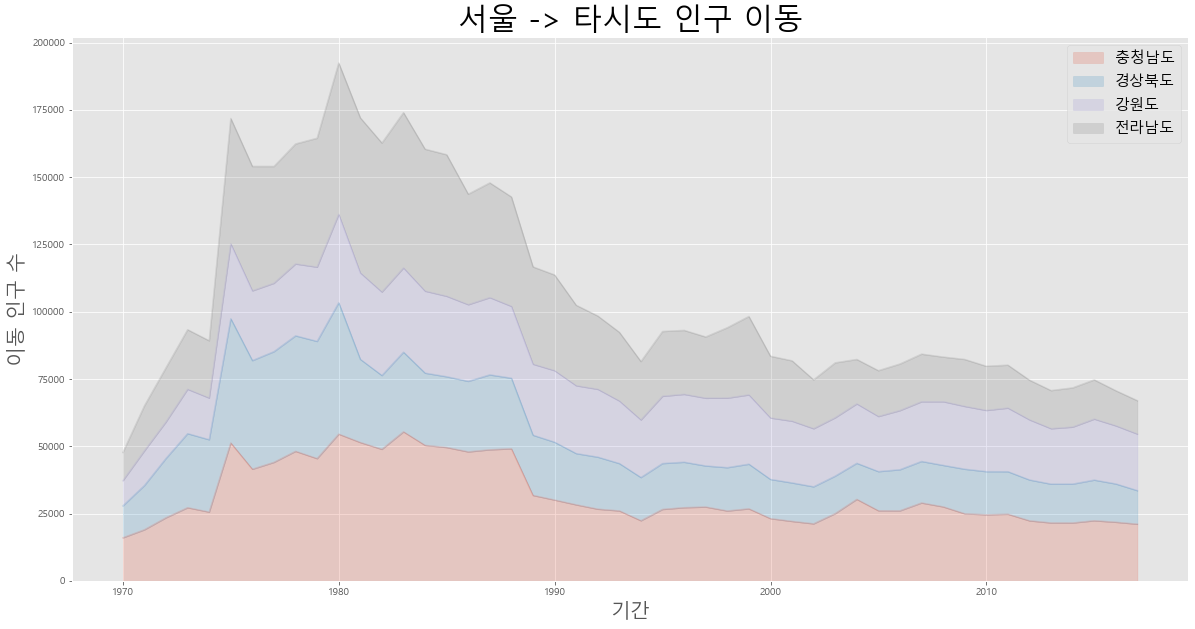

In [ ]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10)) # 겹치지 않고 위로 쌓아서 그리기.

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>


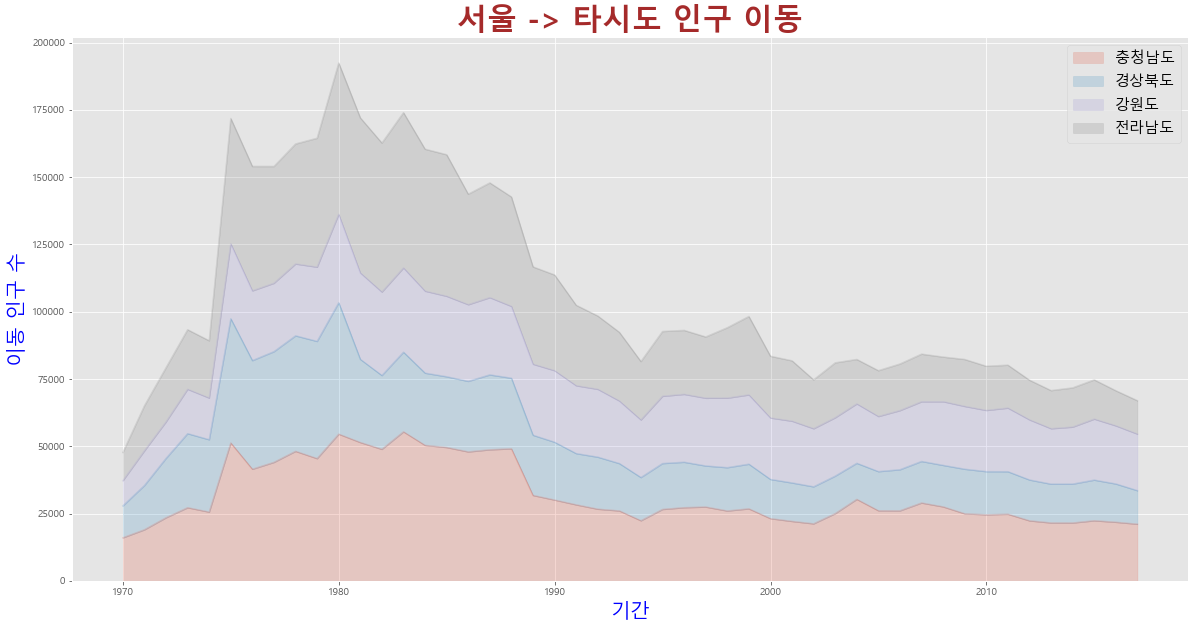

In [ ]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 axe 객체 생성
ax = df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
print(type(ax))

# axe 객체 설정 변경
ax.set_title('서울 -> 타시도 인구 이동', size=30, color='brown', weight='bold')
ax.set_ylabel('이동 인구 수', size=20, color='blue')
ax.set_xlabel('기간', size=20, color='blue')
ax.legend(loc='best', fontsize=15)

plt.show()

### 막대 그래프

In [ ]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('data/시도별 전출입 인구수.xlsx', engine= 'openpyxl', header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))     
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()
df_4

전입지,충청남도,경상북도,강원도,전라남도
2010,24522,16042,22736,16429
2011,24723,15818,23624,15974
2012,22269,15191,22332,14765
2013,21486,14420,20601,14187
2014,21473,14456,21173,14591
2015,22299,15113,22659,14598
2016,21741,14236,21590,13065
2017,21020,12464,21016,12426


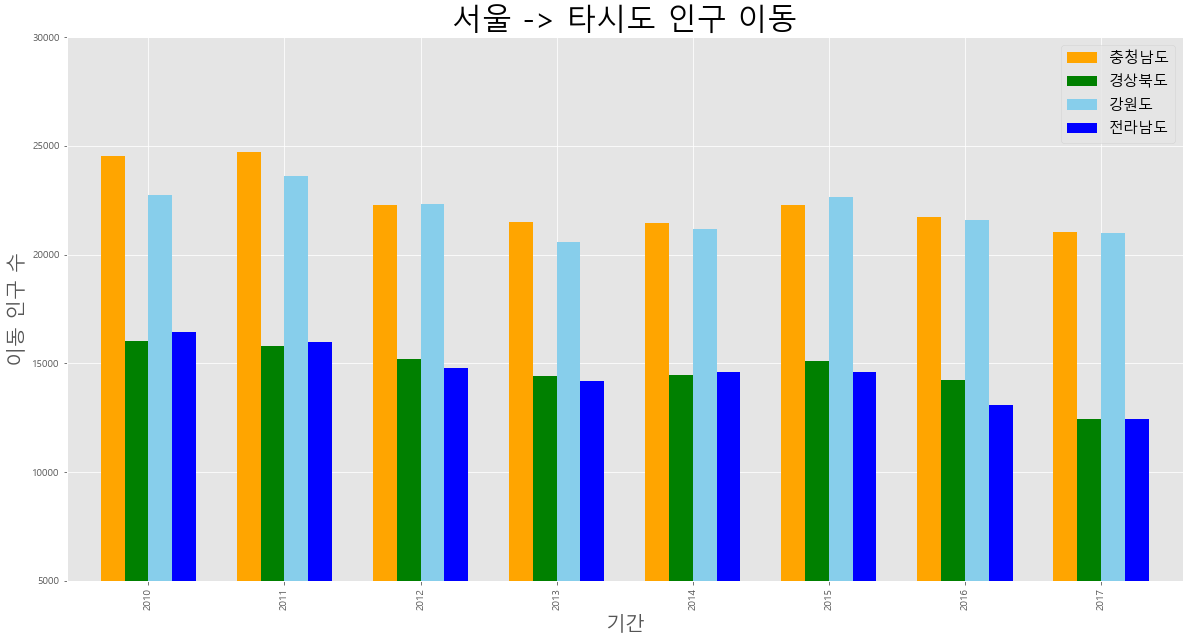

In [ ]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 막대 그래프 그리기
df_4.plot(kind='bar', figsize=(20, 10), width=0.7,
          color=['orange', 'green', 'skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)

plt.show()

In [ ]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('data/시도별 전출입 인구수.xlsx', engine= 'openpyxl', header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

# 2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4['합계'] = df_4.sum(axis=1)

# 가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)
df_total

,합계
전입지,
전라남도,116035.0
경상북도,117740.0
강원도,175731.0
충청남도,179533.0


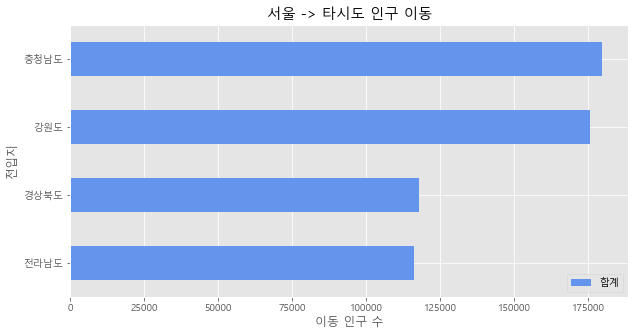

In [ ]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 수평 막대 그래프 그리기
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10, 5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

#### 보조 축 활용하기(2축 그래프)

In [ ]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('data/남북한발전전력량.xlsx', engine= 'openpyxl', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T 

# 증감율(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100      
df

C:\Users\User\AppData\Local\Temp\ipykernel_19240\3880936772.py:2: FutureWarning: convert_float is deprecated and will be removed in a future version.
  df = pd.read_excel('data/남북한발전전력량.xlsx', engine= 'openpyxl', convert_float=True)


발전 전력별,총발전량,수력,화력,원자력,총발전량 - 1년,증감율
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887
1995,230,142,88,-,231,-0.4329
1996,213,125,88,-,230,-7.391304
1997,193,107,86,-,213,-9.389671
1998,170,102,68,-,193,-11.917098
1999,186,103,83,-,170,9.411765


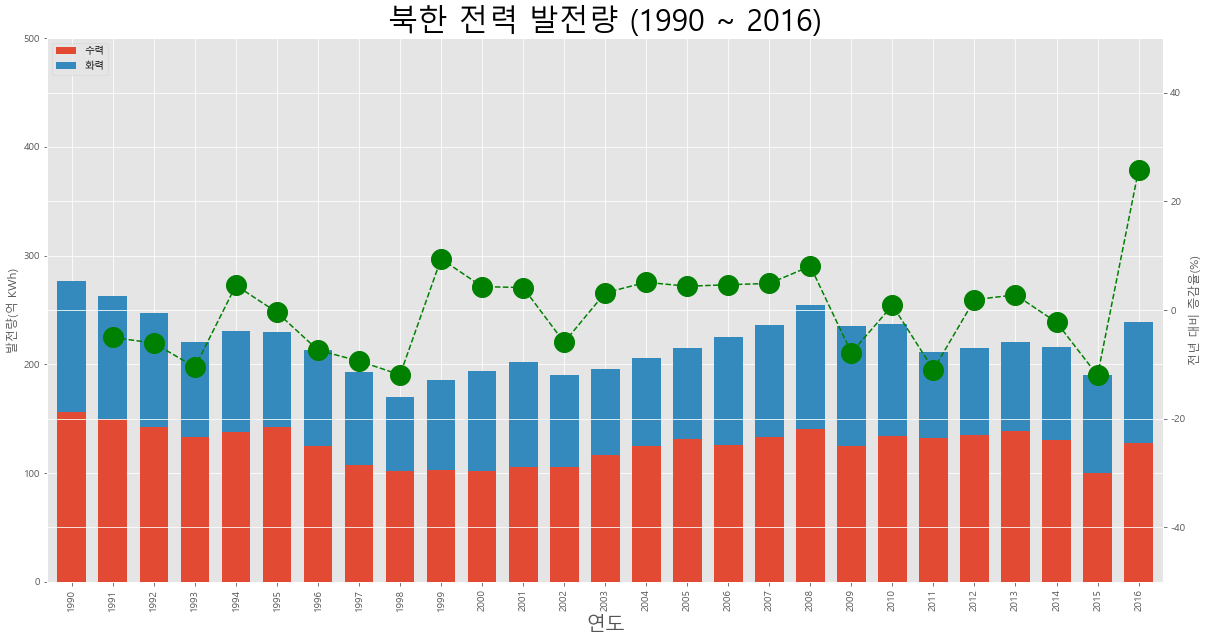

In [ ]:
plt.style.use('ggplot')   # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False   # 마이너스 부호 출력 설정


# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)  
ax2 = ax1.twinx() #ax1의 쌍둥이 객체를 만든다.
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20, 
         color='green', label='전년대비 증감율(%)')  

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')

plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30)
ax1.legend(loc='upper left')

plt.show()

### 히스토그램

In [ ]:
plt.style.use('classic')   # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('data/auto-mpg.csv', header=None)# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


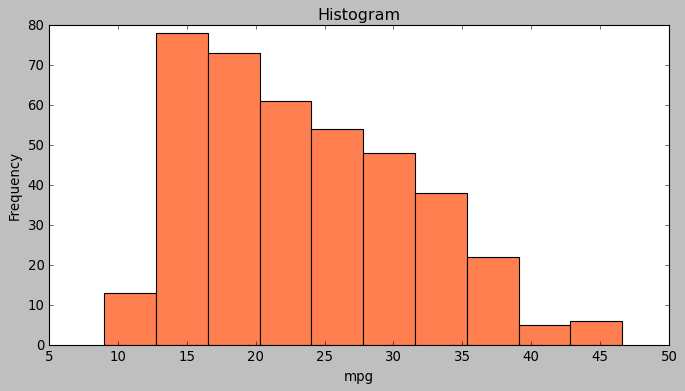

In [ ]:
# 연비(mpg) 열에 대한 히스토그램 그리기
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10, 5))

# 그래프 꾸미기
plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

### 산점도

In [ ]:
# read_csv() 함수로 df 생성
df = pd.read_csv('data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


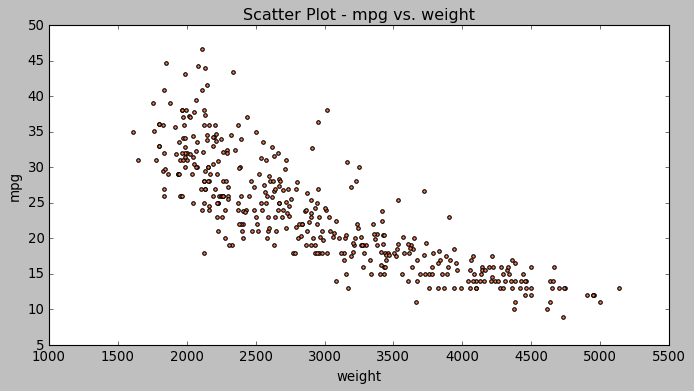

In [ ]:
# 연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5)) #c:점의 색깔을 의미하는 듯
plt.title('Scatter Plot - mpg vs. weight')
plt.show()

In [ ]:
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300
cylinders_size

0      300.0
1      300.0
2      300.0
3      300.0
4      300.0
       ...  
393    150.0
394    150.0
395    150.0
396    150.0
397    150.0
Name: cylinders, Length: 398, dtype: float64

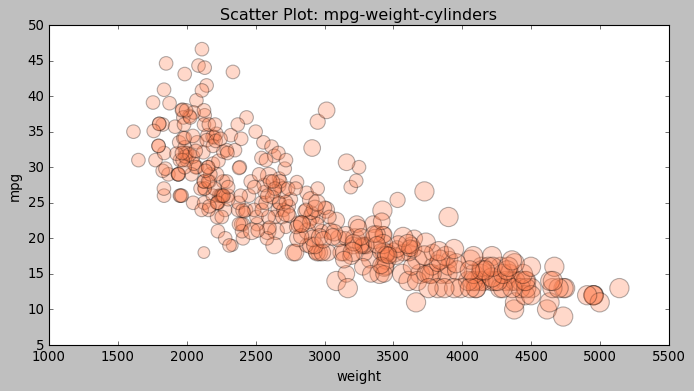

In [ ]:
df.plot(kind='scatter', x='weight', y='mpg', c='coral', figsize=(10, 5),
        s=cylinders_size, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.show()

In [ ]:
'''# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기 
df.plot(kind='scatter', x='weight', y='mpg', marker='+', figsize=(10, 5),
        cmap='viridis', c=cylinders_size, s=50, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')

plt.savefig("./scatter.png")   
plt.savefig("./scatter_transparent.png", transparent=True)   

plt.show()'''

'# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성\ncylinders_size = df.cylinders / df.cylinders.max() * 300\n\n# 3개의 변수로 산점도 그리기 \ndf.plot(kind=\'scatter\', x=\'weight\', y=\'mpg\', marker=\'+\', figsize=(10, 5),\n        cmap=\'viridis\', c=cylinders_size, s=50, alpha=0.3)\nplt.title(\'Scatter Plot: mpg-weight-cylinders\')\n\nplt.savefig("./scatter.png")   \nplt.savefig("./scatter_transparent.png", transparent=True)   \n\nplt.show()'

### 파이 차트

In [ ]:
# read_csv() 함수로 df 생성
df = pd.read_csv('data/auto-mpg.csv', header=None)

plt.style.use('default')   # 스타일 서식 지정

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [ ]:
# 데이터 개수 카운트를 위해 값 1을 가진 열을 추가
df['count'] = 1
df_origin = df.groupby('origin').sum()   # origin 열을 기준으로 그룹화, 합계 연산
print(df_origin.head())                  # 그룹 연산 결과 출력

# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JAPAN']
df_origin

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


,mpg,cylinders,displacement,weight,acceleration,model year,count
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
JAPAN,2405.6,324,8114.0,175477.0,1277.6,6118,79


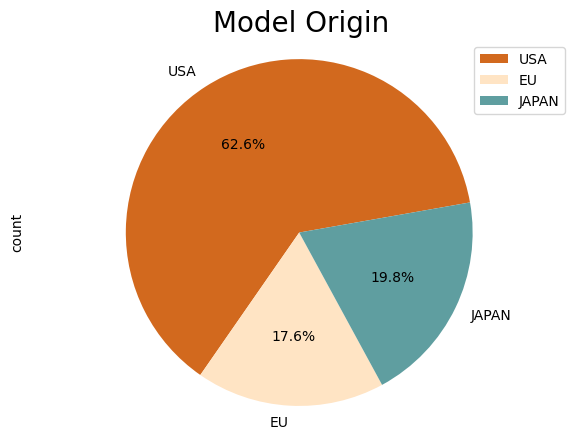

In [ ]:
# 제조국가(origin) 열에 대한 파이 차트 그리기 – count 열 데이터 사용
df_origin['count'].plot(kind='pie', 
                     figsize=(7, 5),
                     autopct='%1.1f%%',   # 퍼센트 % 표시
                     startangle=10,       # 파이 조각을 나누는 시작점(각도 표시)
                     colors=['chocolate', 'bisque', 'cadetblue']    # 색상 리스트
                     )

plt.title('Model Origin', size=20)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc='upper right')   # 범례 표시
# plt.legend() <-- 데이터프레임으로 그래프 객체를 만든거라 이런식으로 넣어도 동일하게 legend가 나옴
plt.show()

### 박스 플롯

In [ ]:
# read_csv() 함수로 df 생성
df = pd.read_csv('data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


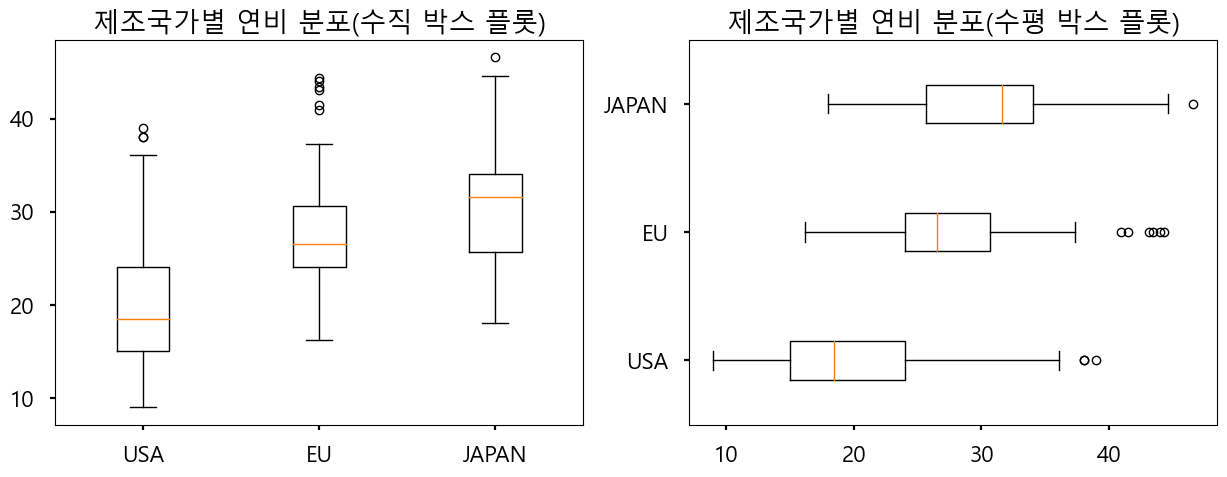

In [ ]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:/windows/fonts/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('seaborn-poster')            # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False   # 마이너스 부호 출력 설정:차이가 뭐지?

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# axe 객체에 boxplot 메서드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'],
         vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

## Seaborn 라이브러리 - 고급 그래프 도구

#### 데이터셋 가져오기

In [ ]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### 회귀선이 있는 산점도

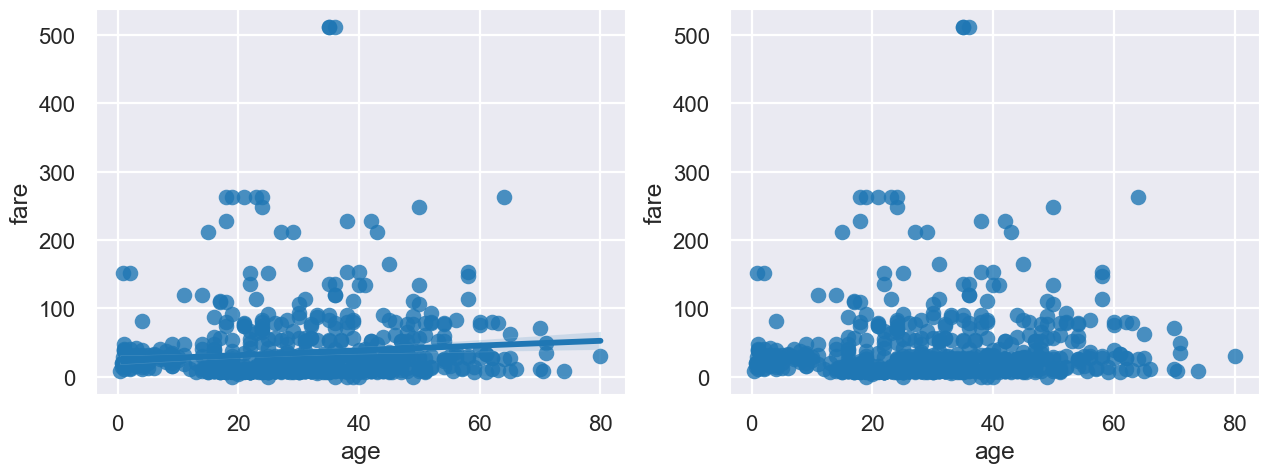

In [ ]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
 
# 그래프 그리기 - 선형회귀선 표시(fit_reg=True)
sns.regplot(x='age',        #x축 변수
            y='fare',       #y축 변수
            data=titanic,   #데이터
            ax=ax1)         #axe 객체 - 1번째 그래프 

# 그래프 그리기 - 선형회귀선 미표시(fit_reg=False)
sns.regplot(x='age',        #x축 변수
            y='fare',       #y축 변수
            data=titanic,   #데이터
            ax=ax2,         #axe 객체 - 2번째 그래프        
            fit_reg=False)  #회귀선 미표시

plt.show()

#### 히스토그램/커널 밀도 그래프

In [ ]:
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

C:\Users\User\anaconda3\envs\visualization\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


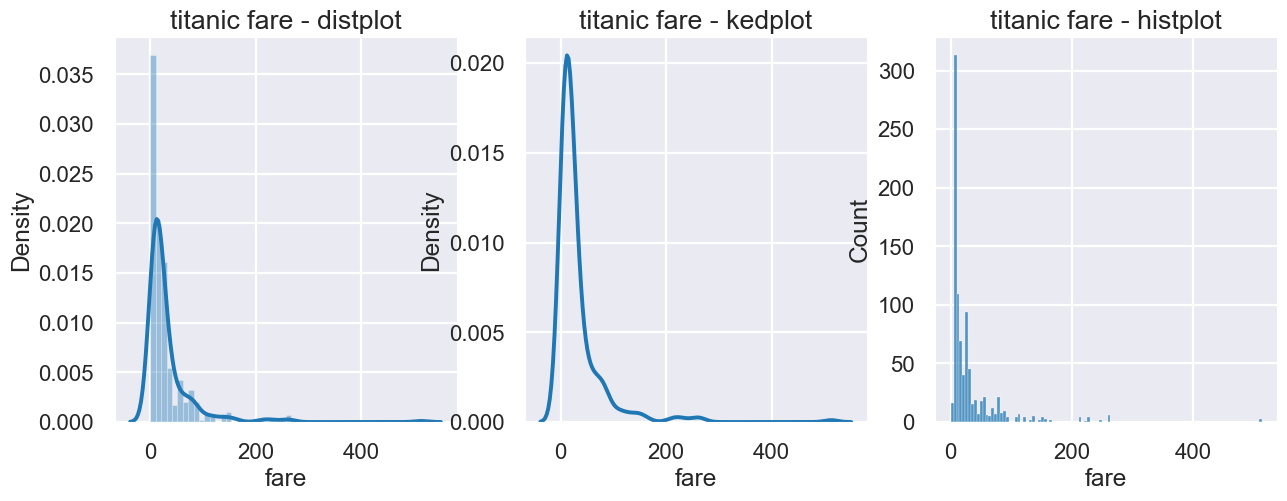

In [ ]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# distplot(이건 나중에 없어진대)
sns.distplot(titanic['fare'], ax=ax1) 

# kdeplot
sns.kdeplot(x='fare', data=titanic, ax=ax2) 

# histplot
sns.histplot(x='fare', data=titanic,  ax=ax3)        

# 차트 제목 표시
ax1.set_title('titanic fare - distplot')
ax2.set_title('titanic fare - kedplot')
ax3.set_title('titanic fare - histplot')

plt.show()

#### 히트맵

In [ ]:
# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


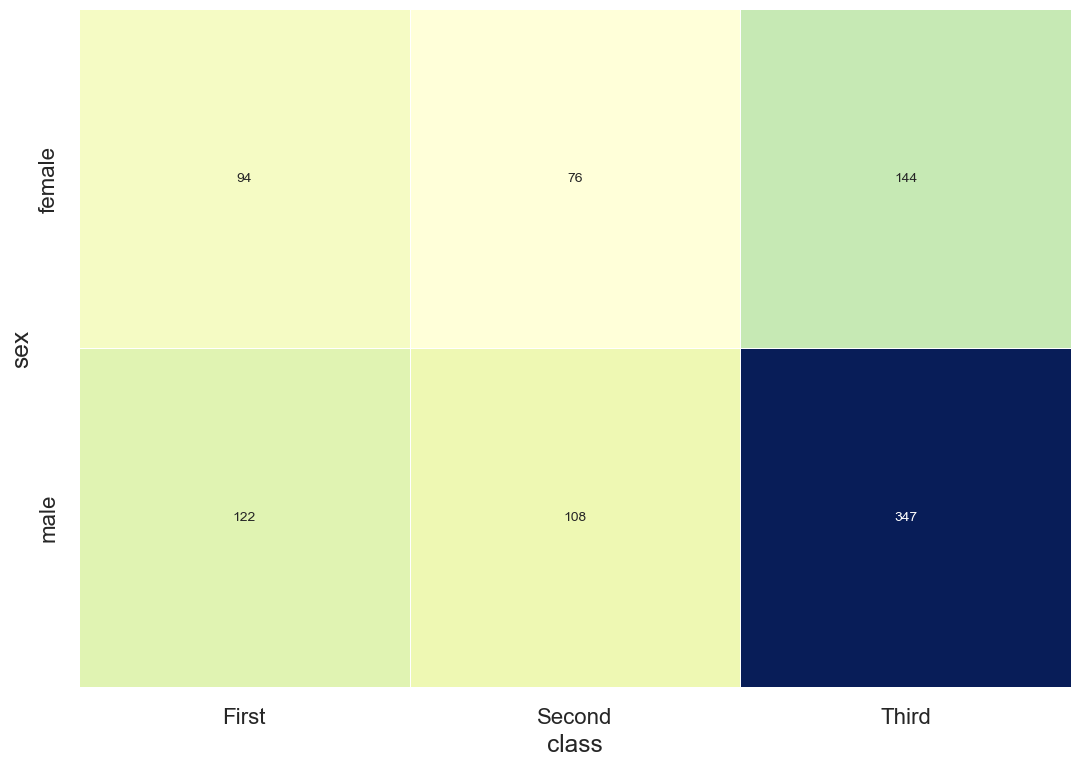

In [ ]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 히트맵 그리기
sns.heatmap(table,                  # 데이터프레임
            annot=True, fmt='d',    # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=False)             # 컬러 바 표시 여부

plt.show()

#### (sns.stripplot)범주형 데이터의 산점도

C:\Users\User\anaconda3\envs\visualization\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


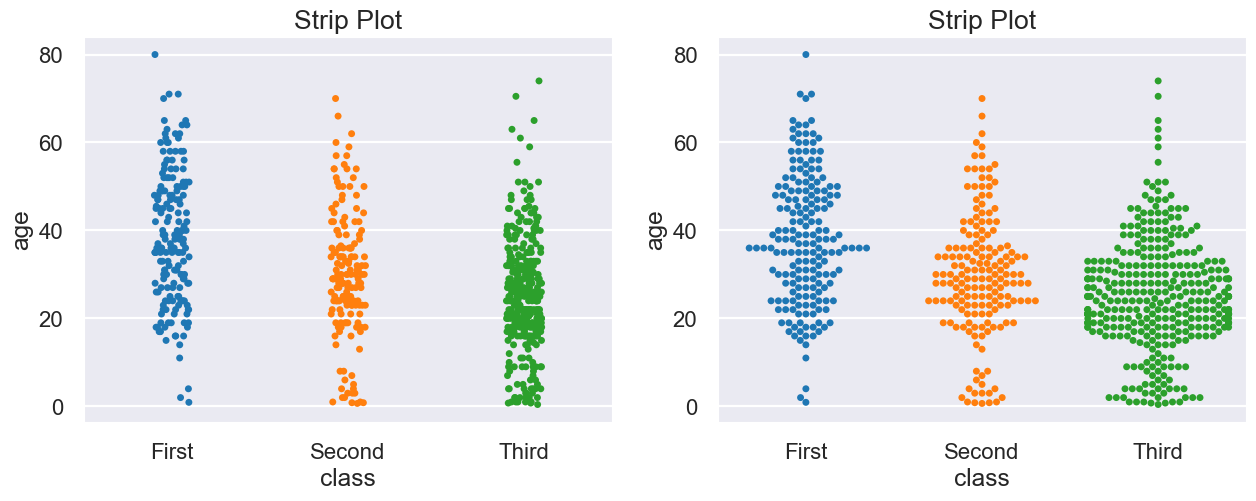

In [ ]:
# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
 
# 이산형 변수의 분포 - 데이터 분산 미고려
sns.stripplot(x="class",      #x축 변수
              y="age",        #y축 변수           
              data=titanic,   #데이터셋 - 데이터프레임
              ax=ax1)         #axe 객체 - 1번째 그래프 

# 이산형 변수의 분포 - 데이터 분산 고려 (중복 X) 
sns.swarmplot(x="class",      #x축 변수
              y="age",        #y축 변수
              data=titanic,   #데이터셋 - 데이터프레임
              ax=ax2)         #axe 객체 - 2번째 그래프        

# 차트 제목 표시
ax1.set_title('Strip Plot')
ax2.set_title('Strip Plot')

plt.show()

#### (sns.barplot) 막대 그래프

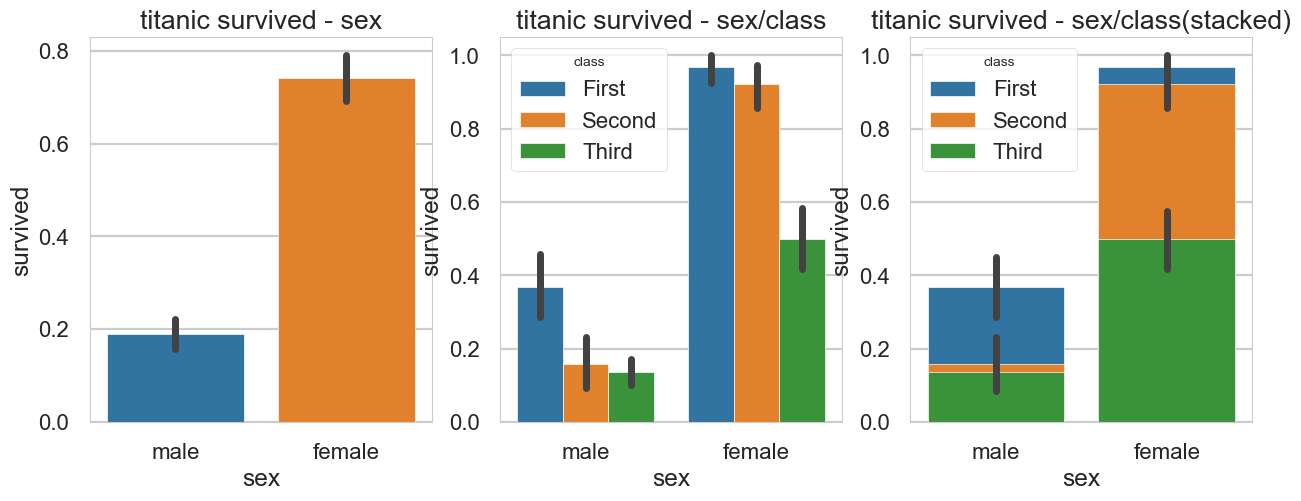

In [ ]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# x축, y축에 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1) 

# x축, y축에 변수 할당하고 hue 옵션 추가 
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2) 

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)       

# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

#### (sns.countplot) 빈도 그래프

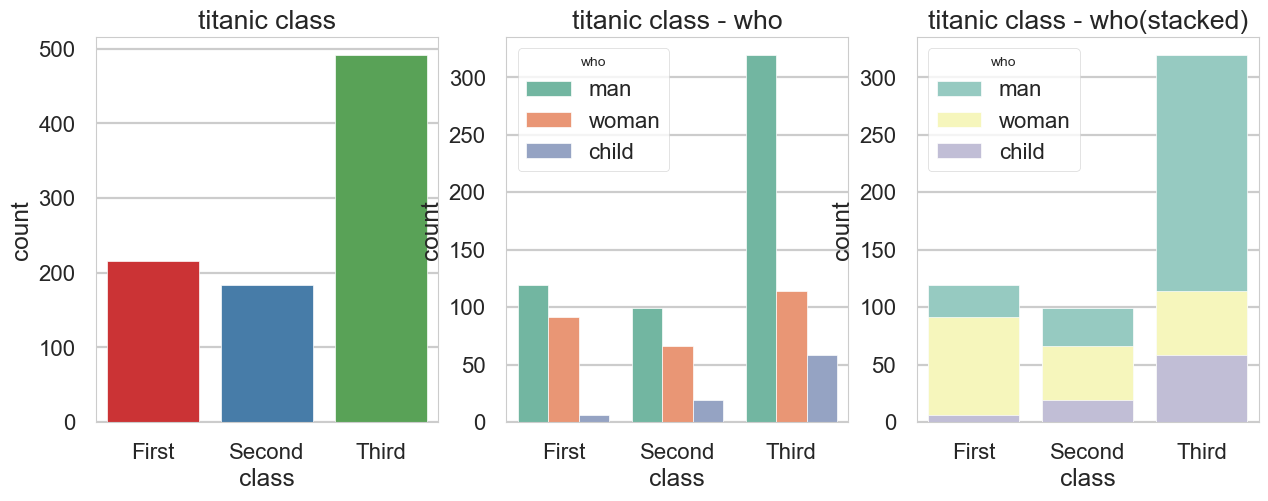

In [ ]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# 기본값
sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1) 

# hue 옵션에 'who' 추가 
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax=ax2) 

# dodge=False 옵션 추가 (축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3)       

# 차트 제목 표시
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

#### 박스 플롯/바이올린 그래프

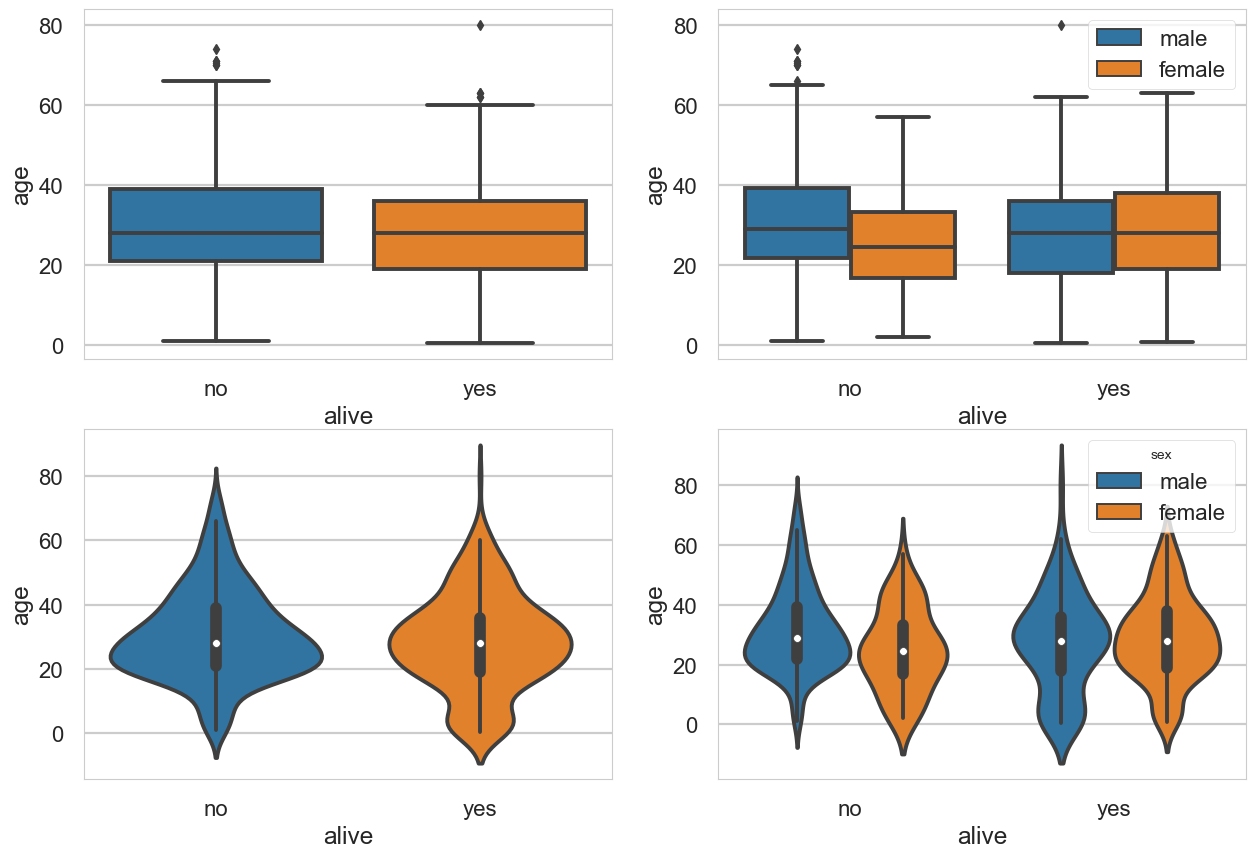

In [ ]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 4개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 10))   
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
 
# 박스 그래프 - 기본값
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1) 

# 바이올린 그래프 - hue 변수 추가
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2) 

# 박스 그래프 - 기본값
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3) 

# 바이올린 그래프 - hue 변수 추가
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4) 
ax2.legend(loc='upper right') # 원래 책의 예제에서는 이거 필요 없었는데... 이거 안하면 이상한데로 감
## 범레 제목도 안뜨넹..
plt.show()

#### 조인트 그래프

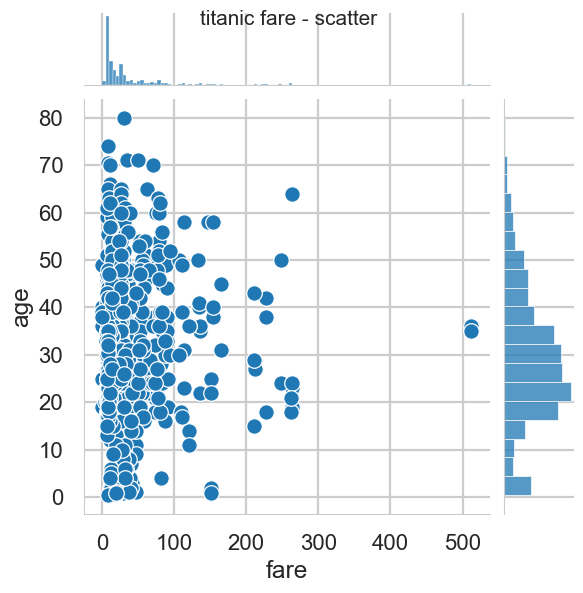

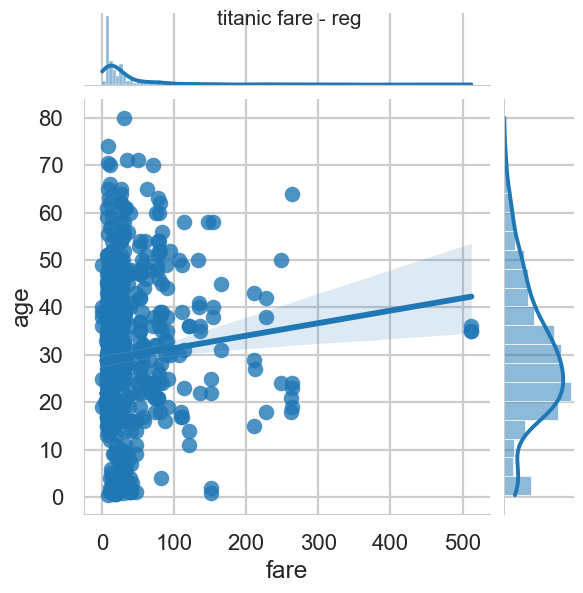

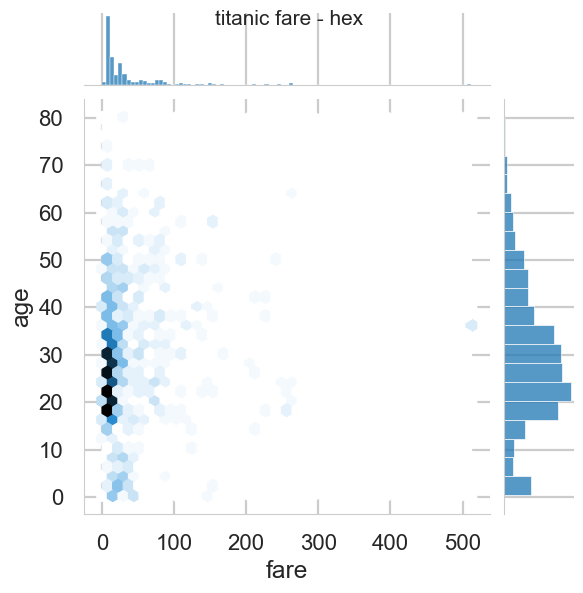

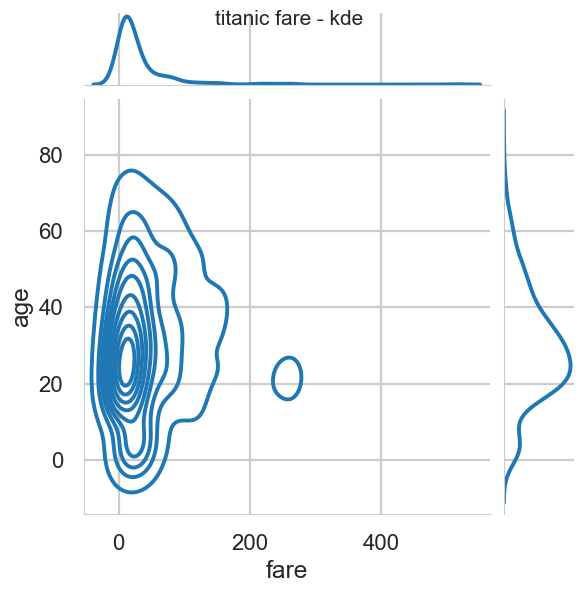

In [ ]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# fig = plt.figure(figsize=(15,15))
# ax1 = fig.add_subplot(2,2,1)
# ax2 = fig.add_subplot(2,2,2)
# ax3 = fig.add_subplot(2,2,3)
# ax4 = fig.add_subplot(2,2,4)
# 이건 서브플롯 못만드나..?

# 조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x='fare', y='age', data=titanic) 

# 조인트 그래프 - 회귀선
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic) 

# 조인트 그래프 - 육각 그래프
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic) 

# 조인트 그래프 - 커럴 밀집 그래프
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic) 

# 차트 제목 표시
j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()

(조인트 플롯을 합치고 싶을 때 확인)https://jehyunlee.github.io/2020/10/03/Python-DS-35-seaborn_matplotlib2/

#### 조건을 적용하여 화면을 그리드로 분할하기

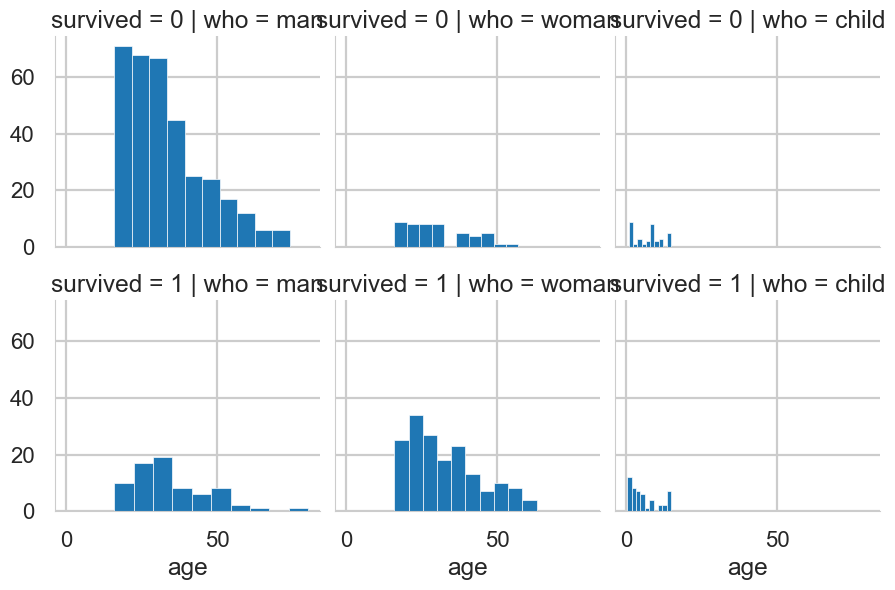

In [ ]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 조건에 따라 그리드 나누기
g = sns.FacetGrid(data=titanic, col='who', row='survived') 

# 그래프 적용하기
g = g.map(plt.hist, 'age')

#### 이변수 데이터의 분포

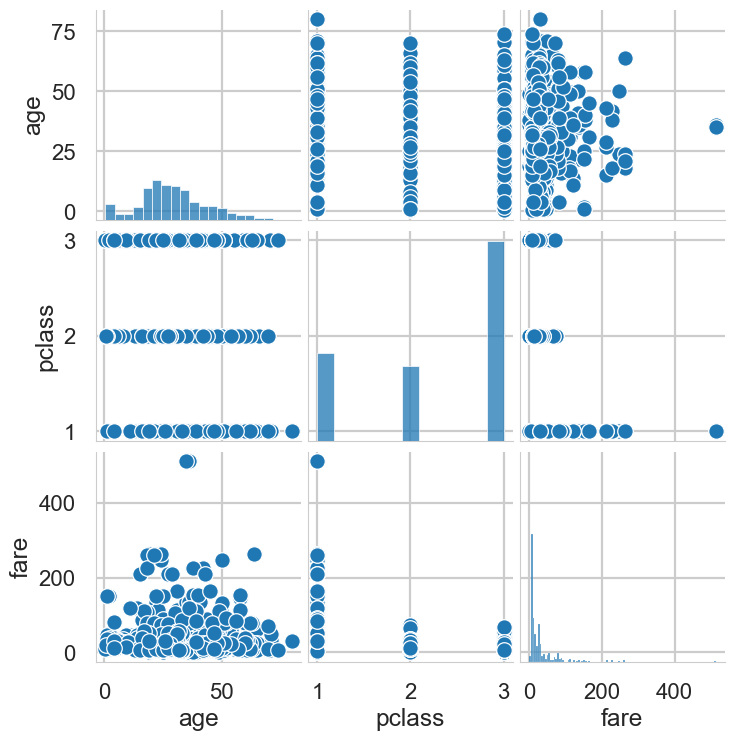

In [ ]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# titanic 데이터셋 중에서 분석 데이터 선택하기
titanic_pair = titanic[['age','pclass', 'fare']]

sns.pairplot(titanic_pair)

## Folium 라이브러리 - 지도 활용

#### 지도 만들기

In [ ]:
# 라이브러리 불러오기
import folium

# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)

# 지도를 HTML 파일로 저장하기
# seoul_map.save('./seoul.html')
seoul_map

#### 지도 스타일 적용하기

In [ ]:
# 서울 지도 만들기
seoul_map2 = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)
seoul_map3 = folium.Map(location=[37.55,126.98], tiles='Stamen Toner', 
                        zoom_start=15)

# 지도를 HTML 파일로 저장하기
# seoul_map2.save('./seoul2.html')
# seoul_map3.save('./seoul3.html')

#### 지도에 마커 표시하기

In [ ]:
# 대학교 리스트를 데이터프레임 변환
df = pd.read_excel('data/서울지역 대학교 위치.xlsx', engine= 'openpyxl')

# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

# 대학교 위치정보를 Marker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.Marker([lat, lng], popup=name).add_to(seoul_map)

seoul_map

In [ ]:
# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

# 대학교 위치정보를 CircleMarker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius=10,         # 원의 반지름
                        color='brown',         # 원의 둘레 색상
                        fill=True,
                        fill_color='coral',    # 원을 채우는 색
                        fill_opacity=0.7, # 투명도    
                        popup=name
    ).add_to(seoul_map)
seoul_map

#### 지도 영역에 단계구분도(Choropleth Map) 표시하기

In [ ]:
# 경기도 인구변화 데이터를 불러와서 데이터프레임으로 변환
file_path = 'data/경기도인구데이터.xlsx'
df = pd.read_excel(file_path, index_col='구분', engine= 'openpyxl')  
df.columns = df.columns.map(str)
df

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구분,,,,,,,,,,,
수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828
수원시권선구,310553,308177,304097,306783,321176,332633,331773,339835,351053,358393,365653
수원시팔달구,216945,213235,219833,216503,209772,206794,204805,203479,199180,198515,193311
수원시영통구,252730,260210,258421,260557,266542,289074,310671,329718,335375,340654,349836
성남시수정구,256744,248452,242161,241070,236123,233997,228167,223539,219531,232841,236932
성남시중원구,263101,265137,259877,258093,254872,253883,256349,251982,250004,237909,230366
성남시분당구,434115,428858,460688,481027,488328,490735,495018,499087,501889,503830,500212
의정부시,421853,430849,431008,431801,430400,429147,430976,431112,433937,438457,441584
안양시만안구,265881,262820,262258,266261,263077,253492,250246,247315,247270,252353,254977


In [ ]:
# 경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path = 'data/경기도행정구역경계.json'
try:
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))
print(type(geo_data))
geo_data

<class 'dict'>


{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': 31380,
    'name': '양평군',
    'name_eng': 'Yangpyeong-gun',
    'base_year': 2013},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.56113535909492, 37.6256560539258],
      [127.57290963929243, 37.61087369350498],
      [127.56366973908277, 37.5842624297699],
      [127.52226606559191, 37.5828628697518],
      [127.50048767007603, 37.569036373178626],
      [127.47687473909174, 37.574448241913856],
      [127.47565866803647, 37.60512112601634],
      [127.44699730711024, 37.64497584741164],
      [127.4272349102434, 37.66284420898682],
      [127.40156700708162, 37.64806970784708],
      [127.3732642199939, 37.6453987554284],
      [127.3542931884407, 37.6250006376975],
      [127.34360057873045, 37.588997440929354],
      [127.31002843450217, 37.53523876142835],
      [127.30923294884336, 37.5135706079458],
      [127.32809611134748, 37.53133849534739],
      [127.3663244453597, 37.5

In [ ]:
# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502,126.982], 
                   tiles='Stamen Terrain', zoom_start=9)

# 출력할 연도 선택 (2007 ~ 2017년 중에서 선택)
year = '2017'  

# Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data=geo_data,    # 지도 경계
                 data = df[year],      # 표시하려는 데이터
                 columns = [df.index, df[year]],  # 열 지정
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                 threshold_scale=[10000, 100000, 300000, 500000, 700000],               
                 key_on='feature.properties.name',
                 ).add_to(g_map)

g_map